# Algerian Forest Fires EDA

 Life cycle of Machine learning Project

1.Understanding the Problem Statement
2.Data Collection
3.Exploratory data analysis
4.Data Cleaning
5.Data Pre-Processing
6.Model Training
7.Choose best model

# Data Collection.

The Dataset is collected from UIC machine learning repository
Dataset link : https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++

Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into â€˜fireâ€™ (138 classes) and â€˜not fireâ€™ (106 classes) classes.

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€

#  Import Data and Required Packages

We Importing Pandas, Numpy, Matplotlib, Seaborn,cufflinks,plotly and Warings Library.

In [7]:
#importing 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import cufflinks as cf
cf.go_offline()

# Importing the dataset

Since data is in form of an csv file we have to use “pandas.read_csv” to load the data and store it in data frame as df.we are setting header = 1 means row 1 ,row 0 it will ignore

In [8]:
df=pd.read_csv(r"C:\Users\DHARAVATH RAMDAS\Downloads\Algerian_forest_fires_dataset_UPDATE.csv",header = 1)

# lets look at datset of first 5 rows

In [9]:
df.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire

# Shape of the data

In [10]:
df.shape

(246, 14)

# we have to clean the dataset

In [11]:
df[121:126]

day  month  year  Temperature   RH   Ws  Rain   \
121                             30     09  2012           25   78   14    1.4   
122  Sidi-Bel Abbes Region Dataset    NaN   NaN          NaN  NaN  NaN    NaN   
123                            day  month  year  Temperature   RH   Ws  Rain    
124                             01     06  2012           32   71   12    0.7   
125                             02     06  2012           30   73   13      4   

     FFMC  DMC   DC  ISI  BUI  FWI    Classes    
121    45  1.9  7.5  0.2  2.4  0.1  not fire     
122   NaN  NaN  NaN  NaN  NaN  NaN          NaN  
123  FFMC  DMC   DC  ISI  BUI  FWI    Classes    
124  57.1  2.5  8.2  0.6  2.8  0.2  not fire     
125  55.7  2.7  7.8  0.6  2.9  0.2  not fire

observation :-
    see the 122 row it contains the nan values 
    see the 123 row it contains the categorical values 
    we have to remove the 122 and 123 rows because it is different from the your data 
    

# we drop index and  reset index

In [12]:
df.drop([122,123],inplace = True)
#it will give index gap so we reset index
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [13]:
df

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
0    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4    05    06  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
239  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
240  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
241  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
242  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
243  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    
0    0.5   not fire     
1    0.4   not fire     
2    0.1   not fire     
3      0   not fire     
4    0.5   not fire     
..   ...           ...  
239  6.5       fire     
240    0   not fire     
241  0.2   not fire     
242  0.7   not fire     
243  0.5  not fire      

[244 rows x 14 columns]

# we add the new column region  (rows 1 = Bejaia Region and 0 =   Sidi Bel-abbes Region)

In [14]:
df['Region'] = 1
for i in range(len(df)):
    if i >= 122:
        df['Region'][i] = 0

In [15]:
df

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
0    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4    05    06  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
239  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
240  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
241  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
242  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
243  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    Region  
0    0.5   not fire          1  
1    0.4   not fire          1  
2    0.1   not fire          1  
3      0   not fire          1  
4    0.5   not fire          1  
..   ...           ...     ...  
239  6.5       fire          0  
240    0   not fire          0  
241  0.2   not fire          0  
242  0.7   not fire          0  
243  0.5  not fire           0  

[244 rows x 15 columns]

observation :-
    we have 244 rows and 15 columns

# check the region

In [16]:
df['Region'].value_counts()

1    122
0    122
Name: Region, dtype: int64

observation :-
    see the above 1 is 122 and 0 is 122 times both are same equal

In [17]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

observation:
    see the columns some have the extra spaces so we have to remove it 

In [18]:
df.columns = [co.strip() for co in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

# see classes label

In [19]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

observation:-
    see the classes it contains some extra spaces so we have to remove it 

In [20]:
df['Classes'] = df['Classes'].str.strip()
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

observation:-
    see we got nan value we have to identify it and set the correct 

In [21]:
df.iloc[165]

day                 14
month               07
year              2012
Temperature         37
RH                  37
Ws                  18
Rain               0.2
FFMC              88.9
DMC               12.9
DC              14.6 9
ISI               12.5
BUI               10.4
FWI            fire   
Classes            NaN
Region               0
Name: 165, dtype: object

observation :-
    see some miss match positions we have to reset it 

In [22]:
df.at[165,'DC'] = 14.6
df.at[165,'ISI'] = 9
df.at[165,'BUI'] = 12.5
df.at[165,'FWI'] = 10.4
df.at[165,'Classes'] = 'fire'

In [23]:
df.loc[165]

day              14
month            07
year           2012
Temperature      37
RH               37
Ws               18
Rain            0.2
FFMC           88.9
DMC            12.9
DC             14.6
ISI               9
BUI            12.5
FWI            10.4
Classes        fire
Region            0
Name: 165, dtype: object

# check the null values 

In [24]:
df.isnull().sum().sum()

0

observation:-
    see that we have no null values

# checking the datatype of each columns

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.7+ KB


observation:-
    see that day is object so its wrong data type so we have change its datatypes 

In [26]:
df=df.astype({'day':'int', 'month':'int', 'year':'int', 'Temperature':'int', 'RH':'int', 'Ws':'int', 'Rain':'float', 'FFMC':'float','DMC':'float', 'DC':'float','ISI':'float', 'BUI':'float', 'FWI':'float',})

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    int64  
dtypes: float64(7), int32(6), int64(1), object(1)
memory usage: 23.0+ KB


observation:
    we are succesfully changed the datatype 

# Show the top 5 rows

In [28]:
df.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI   Classes  Region  
0  0.5  not fire       1  
1  0.4  not fire       1  
2  0.1  not fire       1  
3  0.0  not fire       1  
4  0.5  not fire       1

# shape of dataset

In [29]:
df.shape

(244, 15)

observation:-
    244 rows and 15 columns

# Summary of the dataset

display statistics summary for a dataframe

In [30]:
df.describe()

day       month    year  Temperature          RH          Ws  \
count  244.000000  244.000000   244.0   244.000000  244.000000  244.000000   
mean    15.754098    7.500000  2012.0    32.172131   61.938525   15.504098   
std      8.825059    1.112961     0.0     3.633843   14.884200    2.810178   
min      1.000000    6.000000  2012.0    22.000000   21.000000    6.000000   
25%      8.000000    7.000000  2012.0    30.000000   52.000000   14.000000   
50%     16.000000    7.500000  2012.0    32.000000   63.000000   15.000000   
75%     23.000000    8.000000  2012.0    35.000000   73.250000   17.000000   
max     31.000000    9.000000  2012.0    42.000000   90.000000   29.000000   

             Rain        FFMC         DMC          DC         ISI         BUI  \
count  244.000000  244.000000  244.000000  244.000000  244.000000  244.000000   
mean     0.760656   77.887705   14.673361   49.288115    4.759836   16.673361   
std      1.999406   14.337571   12.368039   47.619662    4.154628   14.201648   
min      0.000000   28.600000    0.700000    6.900000    0.000000    1.100000   
25%      0.000000   72.075000    5.800000   13.275000    1.400000    6.000000   
50%      0.000000   83.500000   11.300000   33.100000    3.500000   12.450000   
75%      0.500000   88.300000   20.750000   68.150000    7.300000   22.525000   
max     16.800000   96.000000   65.900000  220.400000   19.000000   68.000000   

              FWI      Region  
count  244.000000  244.000000  
mean     7.049180    0.500000  
std      7.428366    0.501028  
min      0.000000    0.000000  
25%      0.700000    0.000000  
50%      4.450000    0.500000  
75%     11.375000    1.000000  
max     31.100000    1.000000

we are transposing using T

In [31]:
df.describe().T

count         mean        std     min       25%      50%  \
day          244.0    15.754098   8.825059     1.0     8.000    16.00   
month        244.0     7.500000   1.112961     6.0     7.000     7.50   
year         244.0  2012.000000   0.000000  2012.0  2012.000  2012.00   
Temperature  244.0    32.172131   3.633843    22.0    30.000    32.00   
RH           244.0    61.938525  14.884200    21.0    52.000    63.00   
Ws           244.0    15.504098   2.810178     6.0    14.000    15.00   
Rain         244.0     0.760656   1.999406     0.0     0.000     0.00   
FFMC         244.0    77.887705  14.337571    28.6    72.075    83.50   
DMC          244.0    14.673361  12.368039     0.7     5.800    11.30   
DC           244.0    49.288115  47.619662     6.9    13.275    33.10   
ISI          244.0     4.759836   4.154628     0.0     1.400     3.50   
BUI          244.0    16.673361  14.201648     1.1     6.000    12.45   
FWI          244.0     7.049180   7.428366     0.0     0.700     4.45   
Region       244.0     0.500000   0.501028     0.0     0.000     0.50   

                  75%     max  
day            23.000    31.0  
month           8.000     9.0  
year         2012.000  2012.0  
Temperature    35.000    42.0  
RH             73.250    90.0  
Ws             17.000    29.0  
Rain            0.500    16.8  
FFMC           88.300    96.0  
DMC            20.750    65.9  
DC             68.150   220.4  
ISI             7.300    19.0  
BUI            22.525    68.0  
FWI            11.375    31.1  
Region          1.000     1.0

# we are checking datatypes in the dataset

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    int64  
dtypes: float64(7), int32(6), int64(1), object(1)
memory usage: 23.0+ KB


# we are seperating the numerical and categorical 

check the datatype of column

In [33]:
df['Classes'].dtype

dtype('O')

# Categorical Feature 

In [34]:
cat_col=[fea for fea in df.columns if df[fea].dtype == 'O']
df[cat_col].head()

Classes
0  not fire
1  not fire
2  not fire
3  not fire
4  not fire

observation:
    we have only one cate column

 # Numerical Features

In [35]:
num_col=[fea for fea in df.columns if df[fea].dtype != 'O']

In [36]:
df[num_col].head()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI  Region  
0  0.5       1  
1  0.4       1  
2  0.1       1  
3  0.0       1  
4  0.5       1

observation:
    we have the 14 num columns

# Univariate Analysis

The term univariate analysis refers to the analysis of one variable. You can remember this because the prefix “uni” means “one.”

The purpose of univariate analysis is to understand the distribution of values for a single variable

# Numerical feature analysis 

In [42]:
num_col

['day',
 'month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Region']

# Scattet plot

This plots different observations/values of the same variable corresponding to the index/observation number

# Rain scatterplot

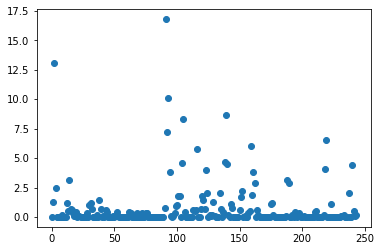

In [43]:
plt.scatter(df.index,df['Rain'])
plt.show()

observation:
    we the how rain is spred high rain is around 17 and less is 0

<AxesSubplot:ylabel='Rain'>

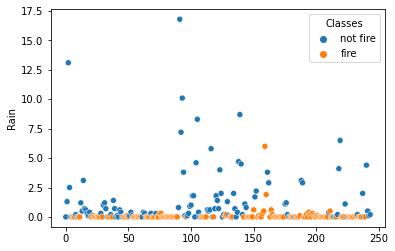

In [90]:
sns.scatterplot(x=df.index,y=df['Rain'],hue=df['Classes'])

observation:
    see how rain is based on the fire and not fire 
    not fire rain is high 
    when rain high is fire is low

<AxesSubplot:ylabel='Temperature'>

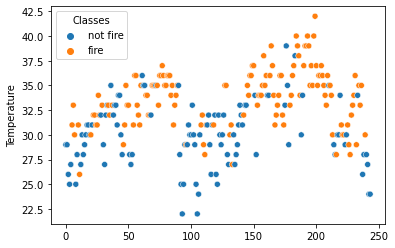

In [91]:
sns.scatterplot(x=df.index,y=df['Temperature'],hue=df['Classes'])

observation:
    when temperature is high then fire is high
    when temperature is low then not fire is high

<AxesSubplot:ylabel='Ws'>

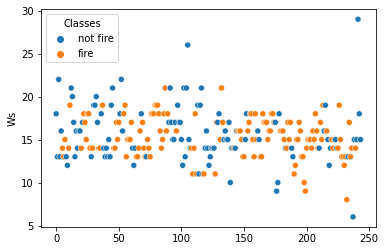

In [92]:
sns.scatterplot(x=df.index,y=df['Ws'],hue=df['Classes'])

observation:
    see the wind speed is then not fire is also high
    when wind speed is low then not fire is low 
    fire is in medium 

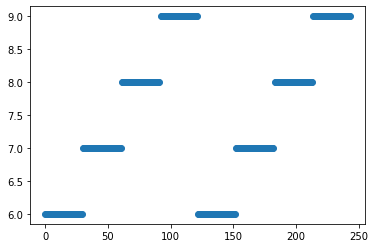

In [46]:
plt.scatter(df.index,df['month'])

observation:
    the month is increasing from 6 to 9

<AxesSubplot:ylabel='FFMC'>

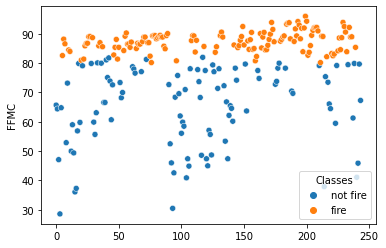

In [95]:
sns.scatterplot(x=df.index,y=df['FFMC'],hue=df['Classes'])

observation:
    when ffmc is high then fire is high 
    when ffmc is low then not fire is low

<AxesSubplot:ylabel='DMC'>

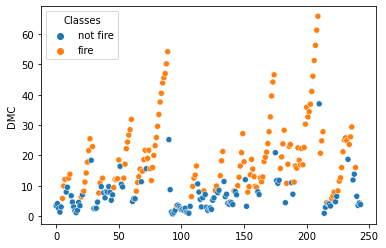

In [96]:
sns.scatterplot(x=df.index,y=df['DMC'],hue=df['Classes'])

<AxesSubplot:ylabel='RH'>

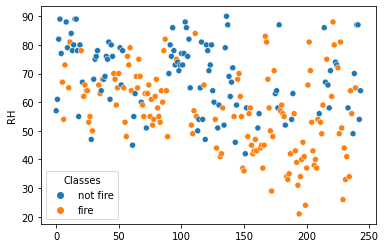

In [97]:
sns.scatterplot(x=df.index,y=df['RH'],hue=df['Classes'])

# Histograms 

A histogram groups values into ranges (or bins), and the height of a bar shows how many values fall in that range.

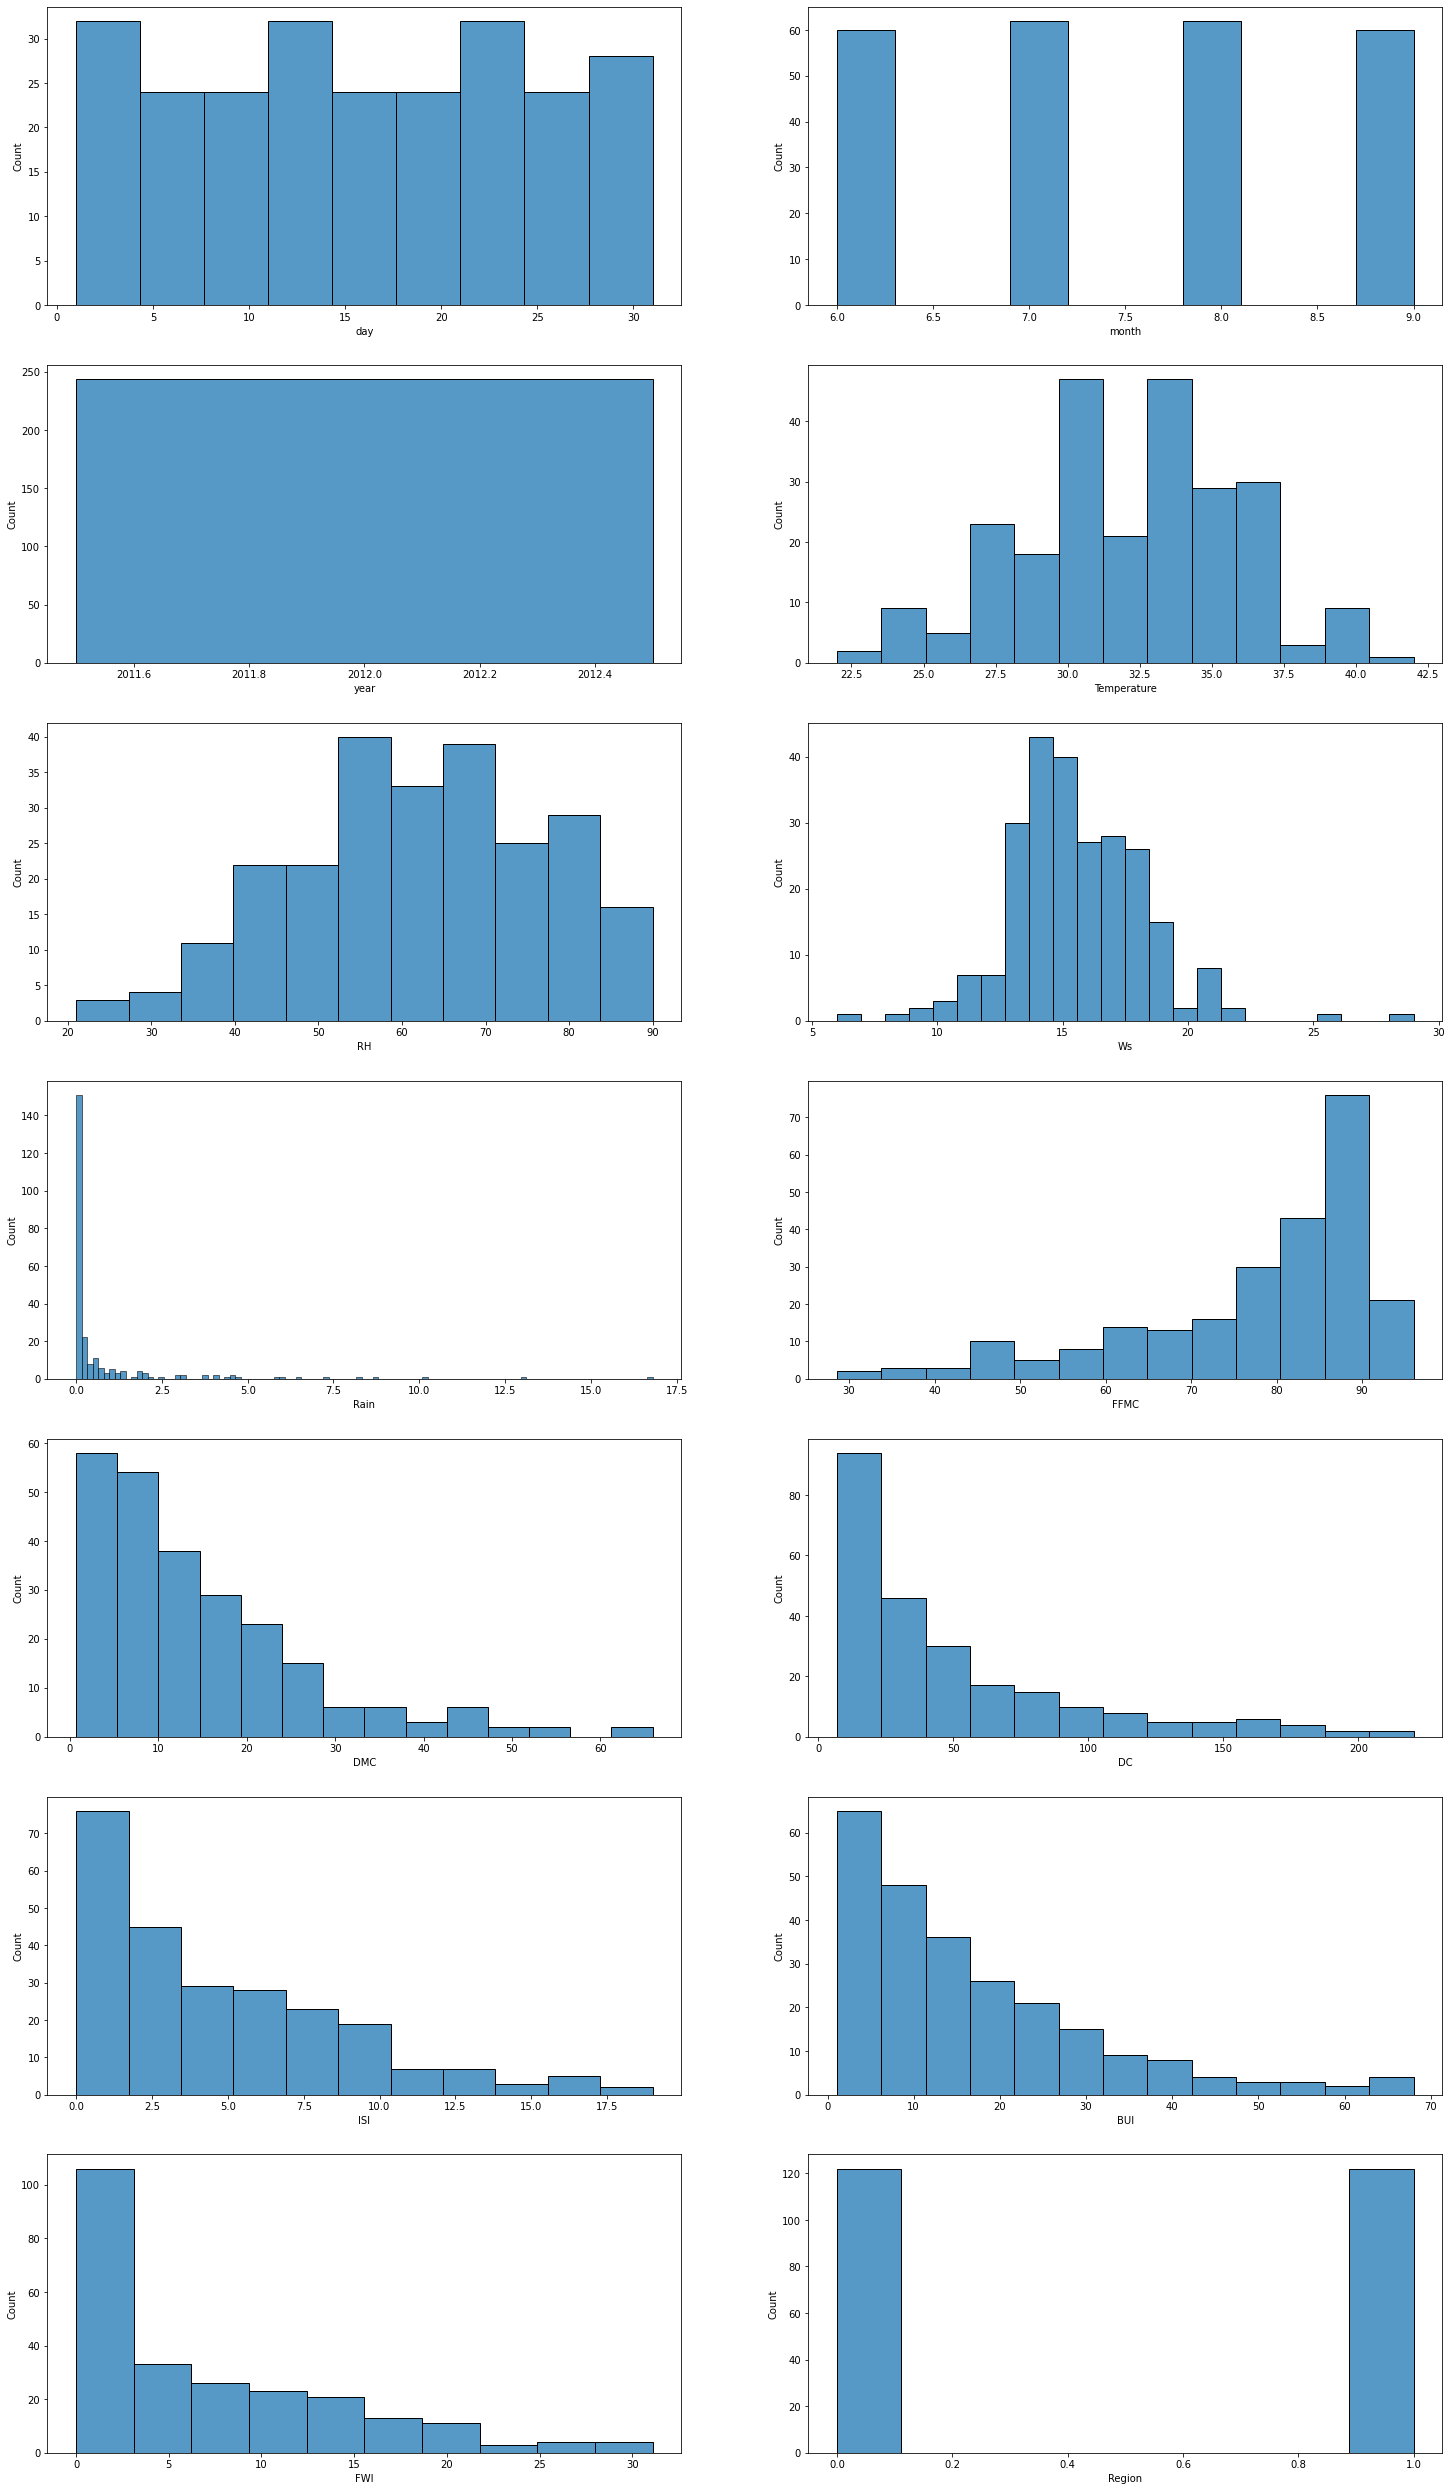

In [47]:
plt.figure(figsize=(25,45))
plt.title("hi")
for i in range(0,len(num_col)):
    plt.subplot(7,2,i+1)
    sns.histplot(x=num_col[i],data=df)
    plt.xlabel(num_col[i])

# Histogram plot with KDE 

We can display a histogram with a KDE curve as below

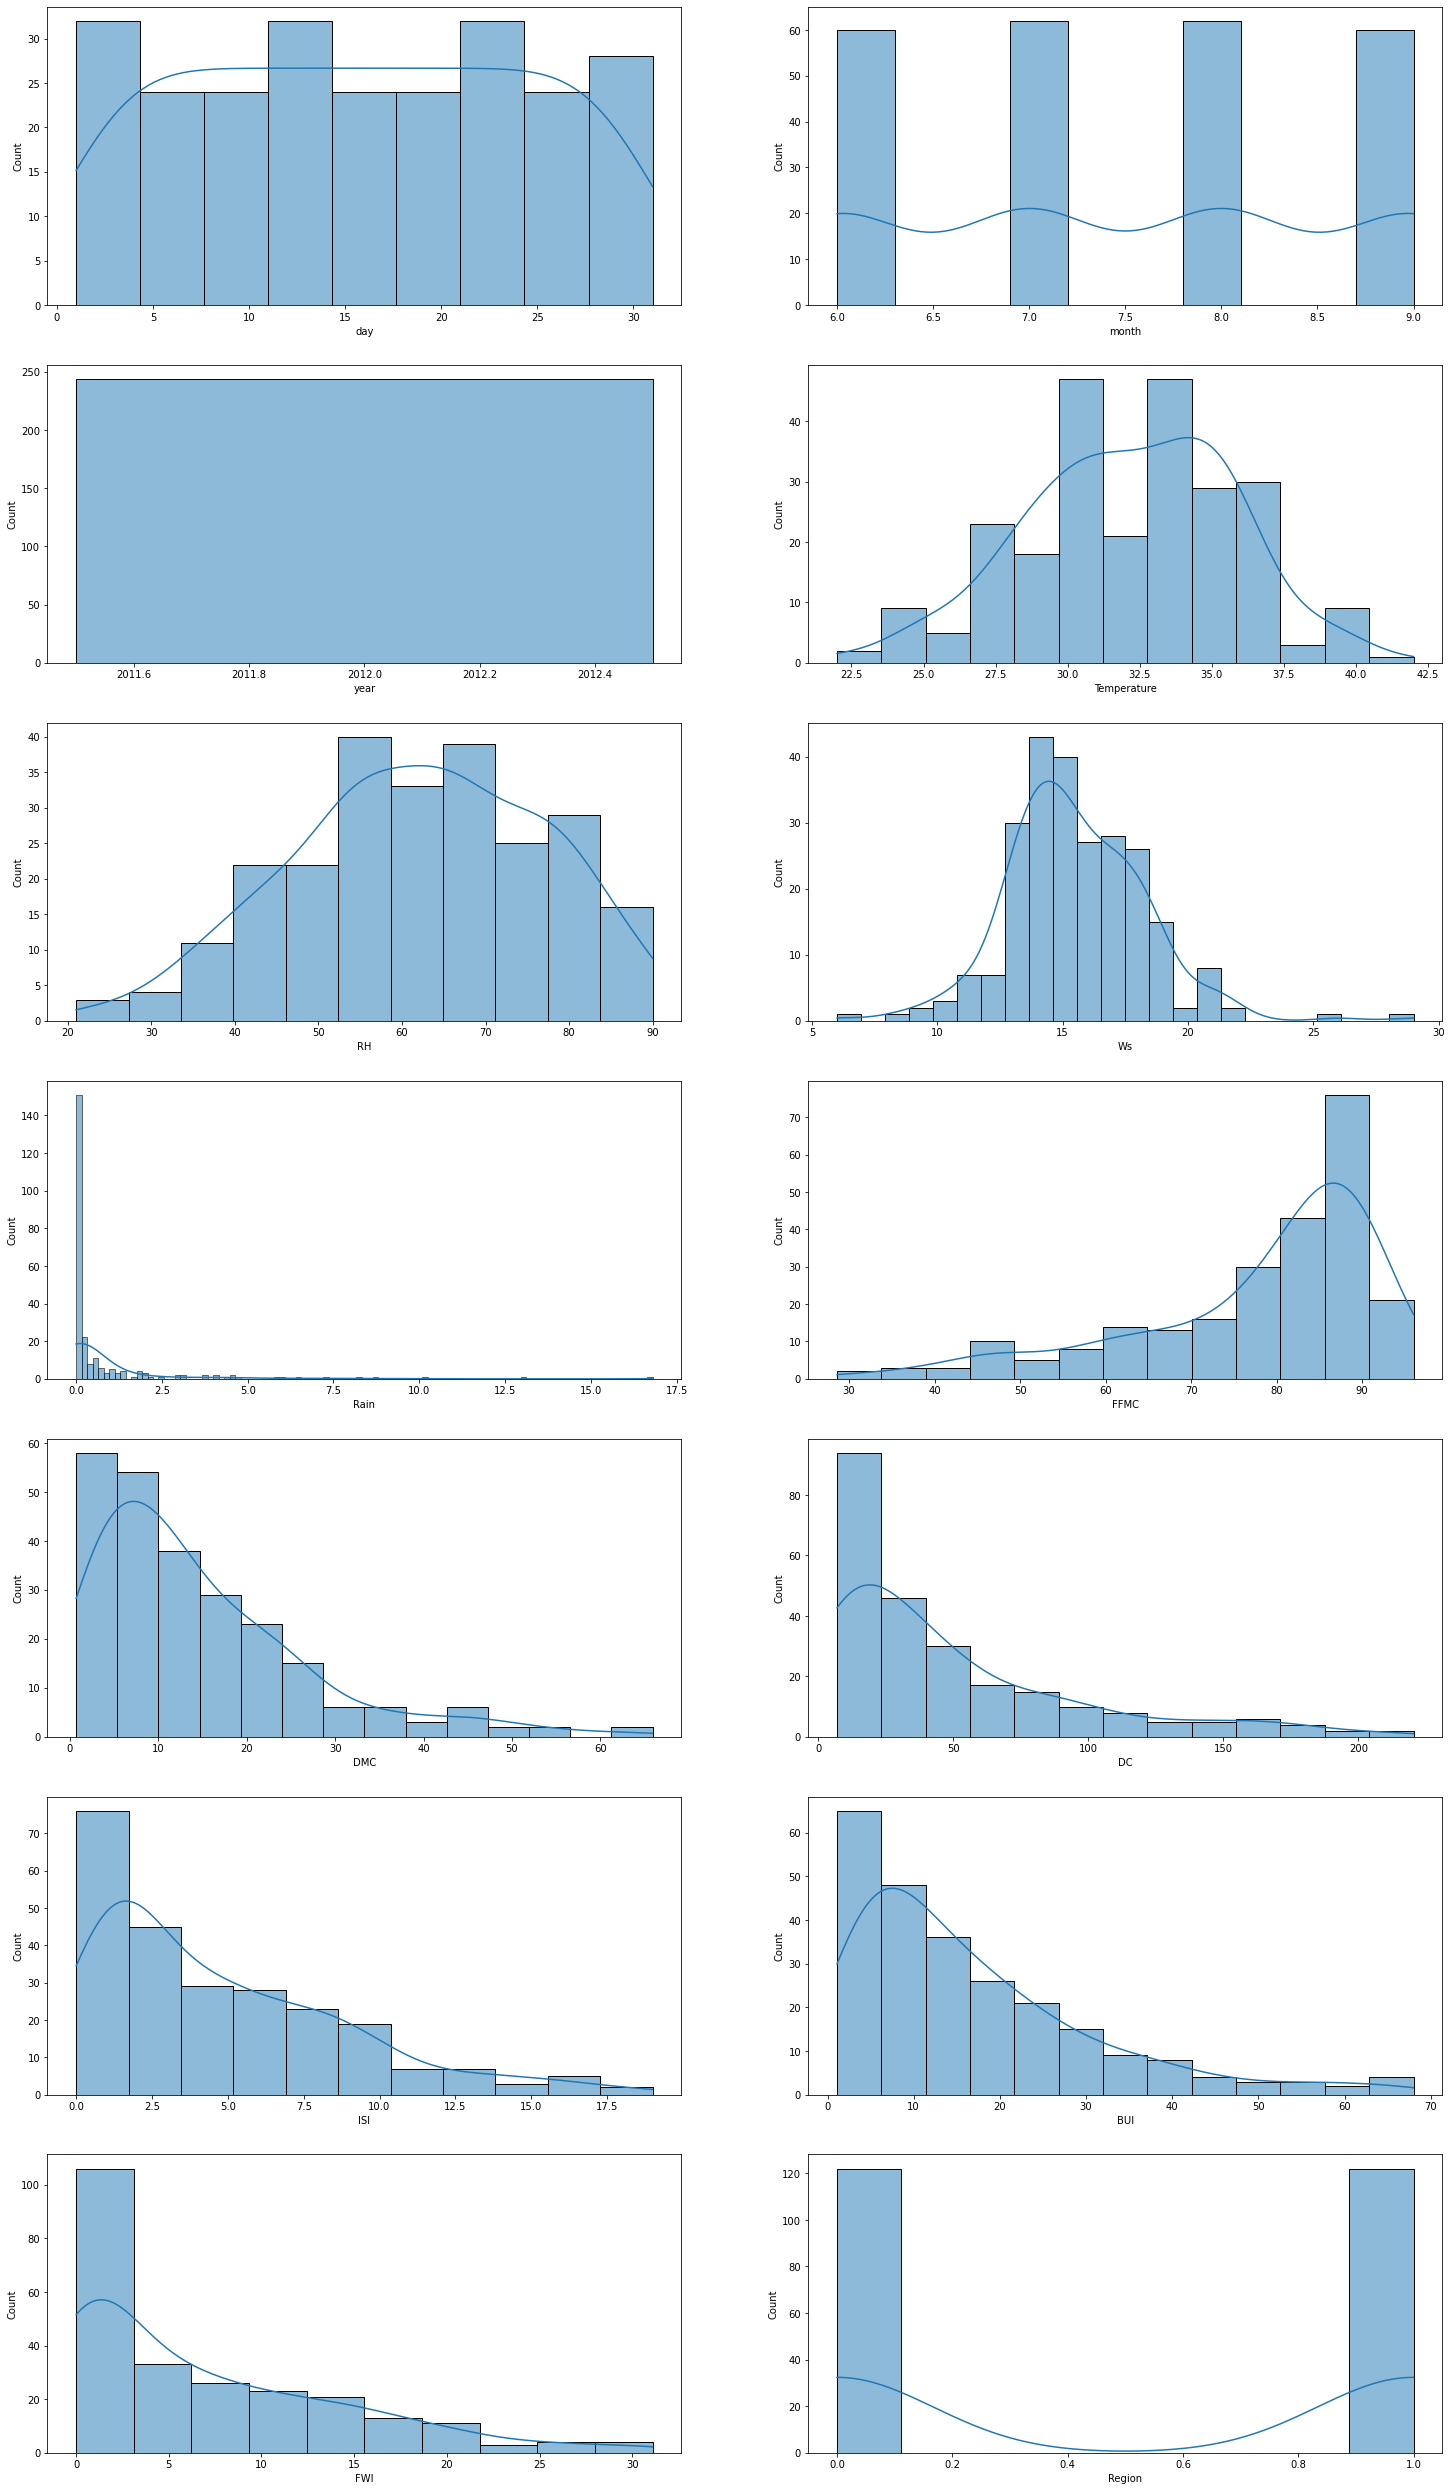

In [48]:
plt.figure(figsize=(25,45))
plt.title("hi")
for i in range(0,len(num_col)):
    plt.subplot(7,2,i+1)
    sns.histplot(x=num_col[i],data=df,kde=True)
    plt.xlabel(num_col[i])

observation:-
    normal distributin plot: day, month, region
    left skew: temperature , FFMC ,RH
    right skew: FWI, ISI, BUI, DMC, DC, Rain
    

# KDE plot

The ‘kernel density estimate’ plot creates a smooth version of a histogram by normalizing all points to appear under one curve.

# kde plot on rain 

<AxesSubplot:xlabel='Rain', ylabel='Density'>

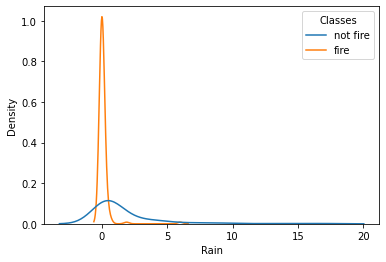

In [49]:
sns.kdeplot(x='Rain',data=df,hue='Classes')

observation:
    1.see the plot the rain fire densicty is high
    2.rain not fire densicty is low

# kde plot on temperature 

<AxesSubplot:xlabel='Temperature', ylabel='Density'>

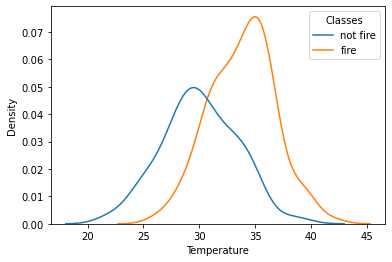

In [50]:
sns.kdeplot(x='Temperature',data=df,hue='Classes')

observations:
    1.temperature fire is high denscity
    2.temperature not fire densicty is low 

# kde plot on ffmc 

<AxesSubplot:xlabel='FFMC', ylabel='Density'>

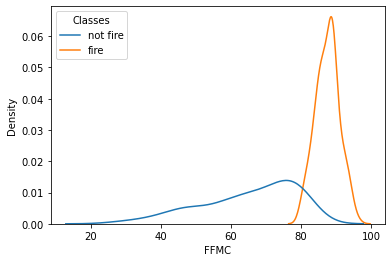

In [98]:
sns.kdeplot(x='FFMC',data=df,hue='Classes')

observation:
    1.when ffmc is high then fire is high 
    2.when ffmc is low then not fire is also low

# kde plot on dmc 

<AxesSubplot:xlabel='DMC', ylabel='Density'>

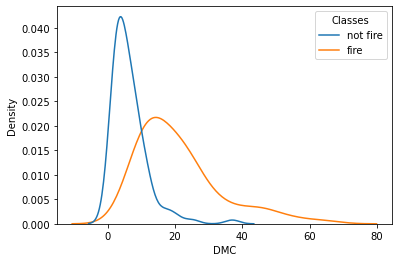

In [99]:
sns.kdeplot(x='DMC',data=df,hue='Classes')

observation:
    1.when dmc is low then not fire is also low
    2.when dmc is high then fire is also medium and high

# kde plot on rh 

<AxesSubplot:xlabel='RH', ylabel='Density'>

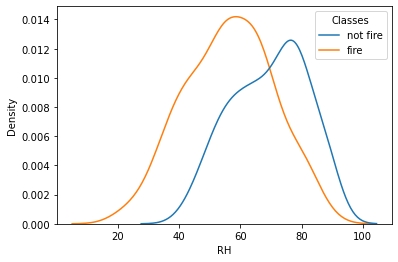

In [100]:
sns.kdeplot(x='RH',data=df,hue='Classes')

observation:
    1.when rh is high then not fire is also high
    2.when rh is low then fire is also low as compared to not fire

# kde plot  on  ws

<AxesSubplot:xlabel='Ws', ylabel='Density'>

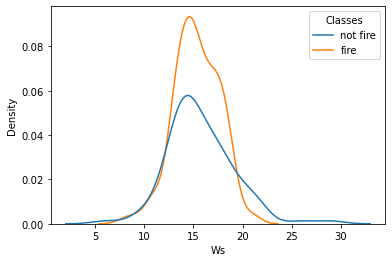

In [101]:
sns.kdeplot(x='Ws',data=df,hue='Classes')

observation:
    1.when ws is medium then the fire is high and the not fire is low

# kde plot on region

<AxesSubplot:xlabel='Region', ylabel='Density'>

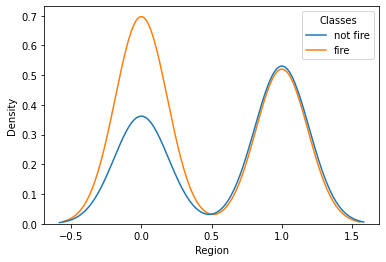

In [103]:
sns.kdeplot(x='Region',data=df,hue='Classes')

observation:
    1.when the region 0 then fire is high not fire is low
    2.when 1 region both are same

# kde plot on month

<AxesSubplot:xlabel='month', ylabel='Density'>

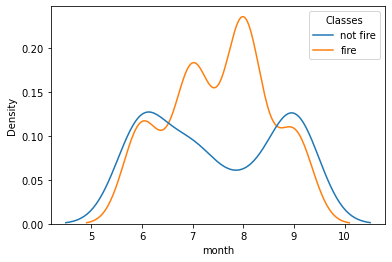

In [104]:
sns.kdeplot(x='month',data=df,hue='Classes')

observation:
    1.when 8th month fire is high and not fire is low

#  Box plots

A boxplot shows the distribution, center and skewness of a numeric feature. It divides the data into sections that contain 25% of the data approximately.

Outliers, if present, appear as dots on either end. The whiskers that extend from the box represent the minimum and maximum values. The box depicts the Interquartile range and holds 50% of the data.

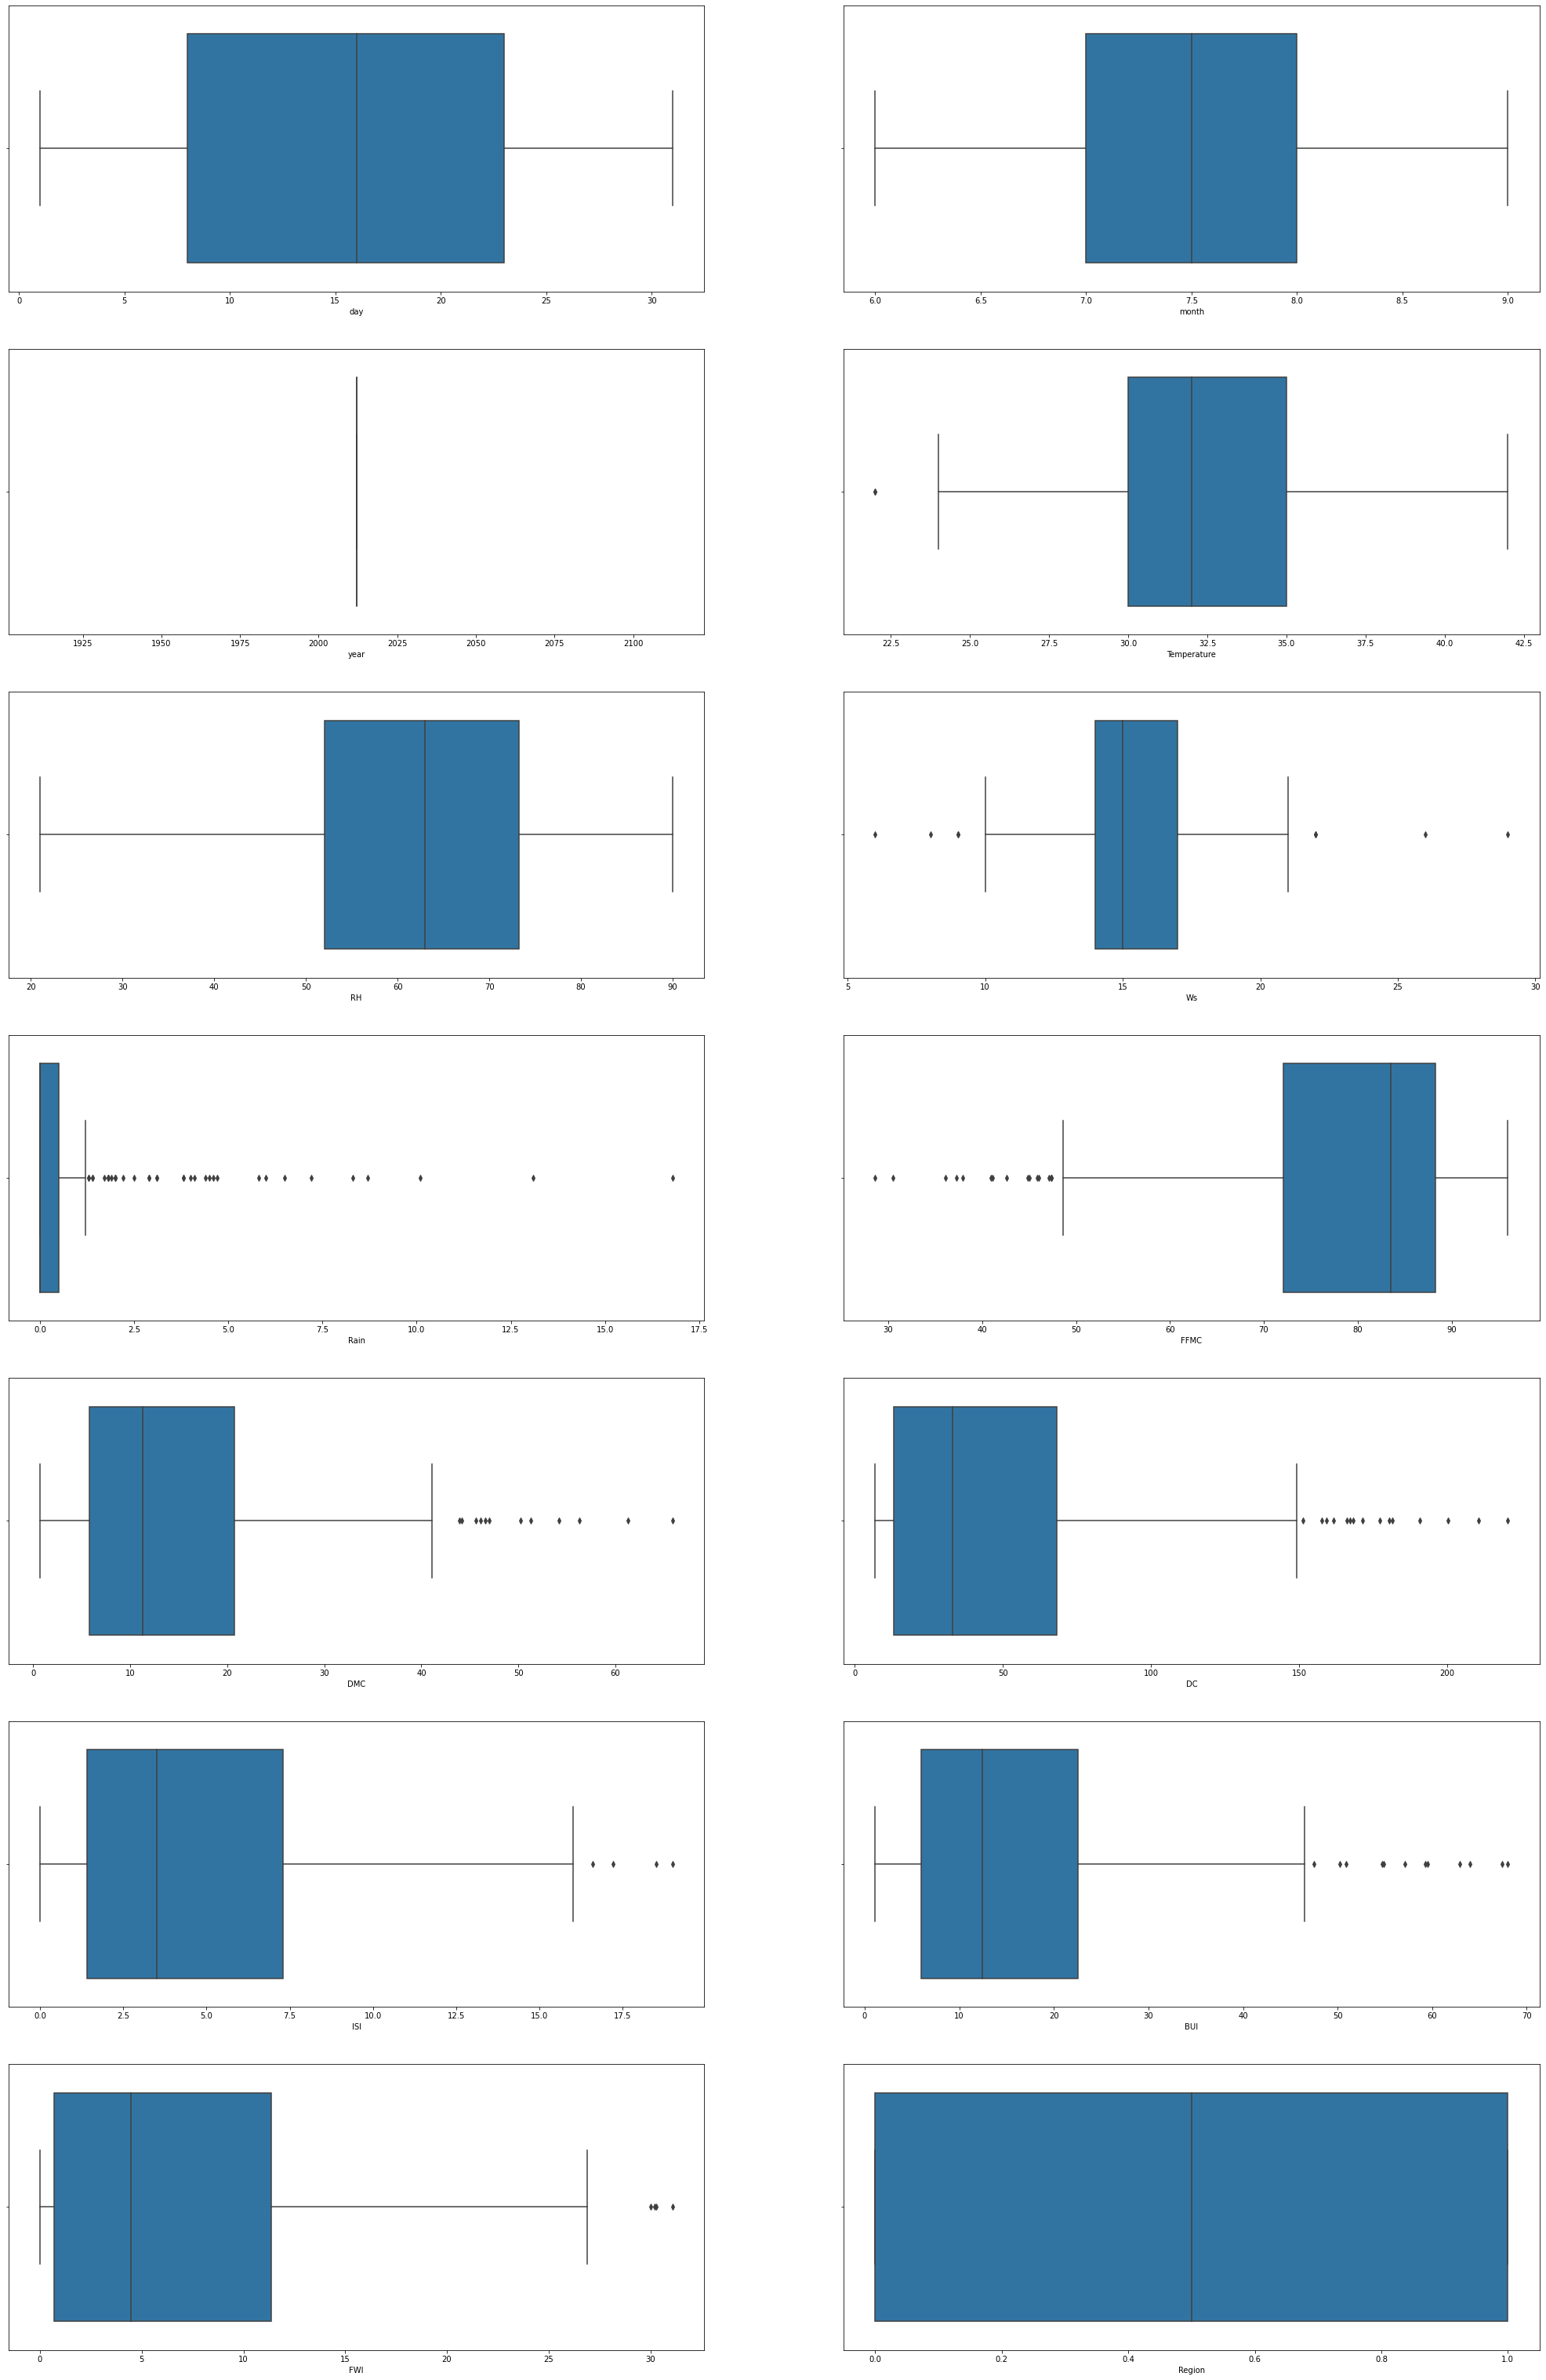

In [105]:
plt.figure(figsize=(35,55))
plt.title("hi")
for i in range(0,len(num_col)):
    plt.subplot(7,2,i+1)
    sns.boxplot(x=df[num_col[i]])
    plt.xlabel(num_col[i])

observation:-
    see the boxplot some outlyers in FWI, BUI, ISI, DC, DMC, FFMC, Rain, Ws, Temperature
    no outlyers in day, month, year, region ,RH

# Violin plot — sns.violinplot()

The violin plot features a combination of a box plot and a kernel density plot. This means that in addition to showing the quartiles, it also lays out the underlying distribution such as presence and location of different peaks.

In [ ]:
sns.violinplot(x=df['Rain'])

In [ ]:
sns.violinplot(x=df['Temperature'])

# Strip plot 

A strip plot implements a scatter plot to show the spread of individual observations for a feature.

Dense locations indicate areas with many overlapping points, and you can quickly spot outliers. It’s however hard to establish the relative center unlike a box plot

# strip plot on rain

<AxesSubplot:xlabel='Rain'>

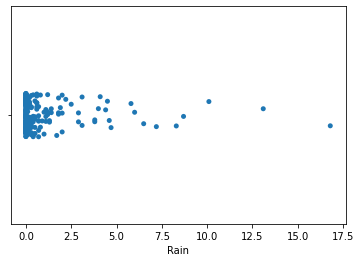

In [52]:
sns.stripplot(x=df['Rain'])

observation:
    1.when see the plot most of rain in 0 to 5 and less rain in between 5 to 17.5

# stripplot on ffmc

<AxesSubplot:xlabel='FFMC'>

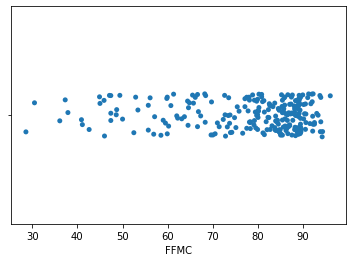

In [107]:
sns.stripplot(x=df['FFMC'])

observation:
    1.see plot the most of ffmc is in between 90 and 60 
    2.less ffmc in between 60 and 30

# stripplot on temperature

<AxesSubplot:xlabel='Temperature'>

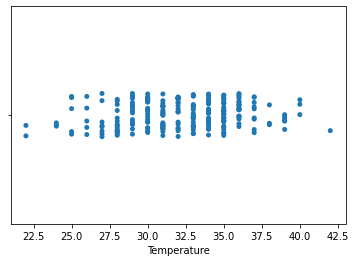

In [108]:
sns.stripplot(x=df['Temperature'])

observation:
    1.see plot most of temperature is in between 25 to 40 
    2.less in between 22 to 25 and 40 to 42.5

# Visualizing Categorical Variables

# Bar Chart

The bar plot is a univariate data visualization plot on a two-dimensional axis. One axis is the category axis indicating the category, while the second axis is the value axis that shows the numeric value of that category, indicated by the length of the bar.

The plot.bar() function plots a bar plot of a categorical variable. The value_counts() returns a series containing the counts of unique values in the variable.

# barchart on classes

<AxesSubplot:>

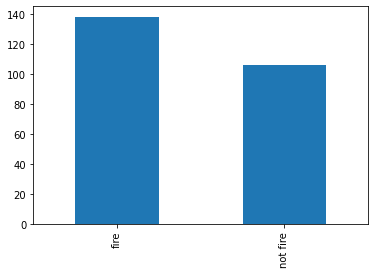

In [53]:
df['Classes'].value_counts().plot.bar()

In [ ]:
observation:
    1.see barchart fire is more and not fire is less 

# Pie Chart

A pie chart is the most common way used to visualize the numerical proportion occupied by each of the categories.
Use the plt.pie() function to plot a pie chart. Since the categories are equally distributed, divide the sections in the pie chart is equally. Then add the labels by passing the array of values to the ‘labels’ parameter.

# pie chart on classes

([<matplotlib.patches.Wedge at 0x23e57fa9cd0>,
 [Text(-0.22500720993803214, 1.0767412667284106, 'fire'),
  Text(0.2250071091262376, -1.0767412877951015, 'not fire')])

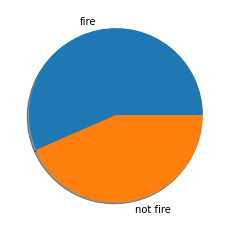

In [54]:
plt.pie(df['Classes'].value_counts(),labels=['fire','not fire'],shadow=True)

observation :
    1.see chart fire is more as compared to not fire so not fire is less

# piechart on classes with percentage

([<matplotlib.patches.Wedge at 0x23e57dca340>,
 [Text(-1.0767412667284106, -0.22500720993803208, 'fire'),
  Text(1.0767412877951015, 0.22500710912623753, 'not fire')],
 [Text(-0.5873134182154967, -0.12273120542074475, '56.557'),
  Text(0.5873134297064189, 0.12273115043249319, '43.443')])

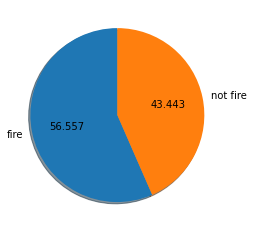

In [55]:
plt.pie(df['Classes'].value_counts(),startangle=90,autopct='%.3f',labels=['fire','not fire'],shadow=True)

 observation:
    1. fire is more 56.55%  in pie chart
    2.not fire is less 43.44% in pie chart

# Countplot 

The countplot() function of the seaborn library obtains a similar bar plot. There is no need to separately calculate the count when using the sns.countplot() function.

# count plot on classes

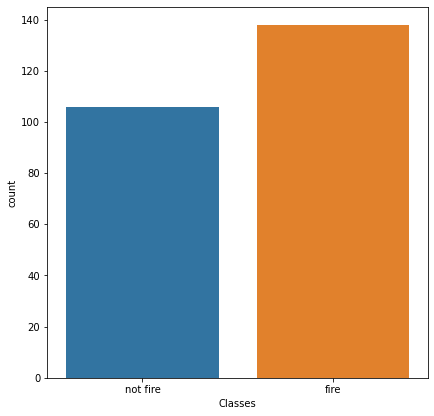

In [56]:
plt.figure(figsize=(15,15))
plt.title("hi")
for i in range(0,len(cat_col)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cat_col[i]])
    plt.xlabel(cat_col[i])

observation:
    1.fire is more as compared to not fire 
    2.not fire is less as compared to fire

# Bivariate Analysis

It is a methodical statistical technique applied to a pair of variables (features/ attributes) of data to determine the empirical relationship between them. In order words, it is meant to determine any concurrent relations (usually over and above a simple correlation analysis).

# Barplot

It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

#  barplot on rain vs classes

<AxesSubplot:xlabel='Rain', ylabel='Classes'>

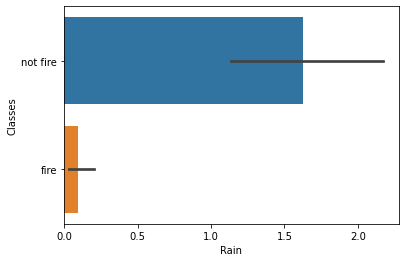

In [57]:
sns.barplot(x='Rain',y='Classes',data=df)

observation:
    1.rain is high then not fire is also high
    2.rain is low then fire is low

# barplot on classes vs region

<AxesSubplot:xlabel='Classes', ylabel='Region'>

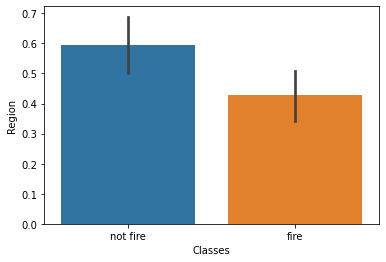

In [110]:
sns.barplot(x='Classes',y='Region',data=df)

observation:
    1.not fire is high as compared to fire

# barplot on ffmc vs classes

<AxesSubplot:xlabel='FFMC', ylabel='Classes'>

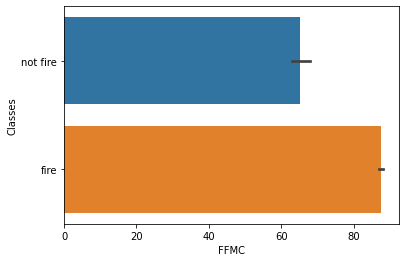

In [111]:
sns.barplot(x='FFMC',y='Classes',data=df)

observation:
    1.ffmc is high fire is high
    2.when ffmc is low then not fire is low

# barplot on dmc vs classes

<AxesSubplot:xlabel='DMC', ylabel='Classes'>

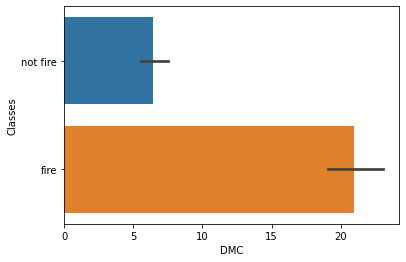

In [112]:
sns.barplot(x='DMC',y='Classes',data=df)

observation:
    1.when dmc is high then fire is high
    2.when dmc is low then fire is low

# Boxplot

A box-plot is a very useful and standardized way of displaying the distribution of data based on a five-number summary (minimum, first quartile, second quartile(median), third quartile, maximum). It helps in understanding these parameters of the distribution of data and is extremely helpful in detecting outliers.

# boxplot on classes vs temperature

<AxesSubplot:xlabel='Classes', ylabel='Temperature'>

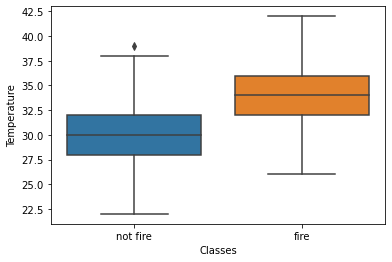

In [58]:
sns.boxplot(x='Classes',y='Temperature',data=df)

observation:
    1.we found an outlyer in not fire and temperature in 40 temperature
    2.in fire and temperature  no outlyers

# rain and classes

<AxesSubplot:xlabel='Rain', ylabel='Classes'>

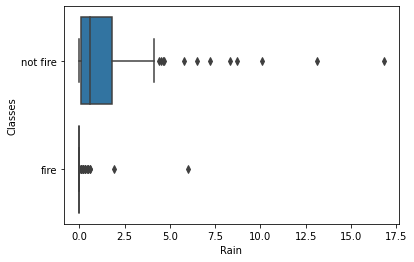

In [59]:
sns.boxplot(x='Rain',y='Classes',data=df)

observation:
    1.we found some outlyers in not fire and rain in 5 to 17.5
    2.we found some outlyers in fire and rain in 2.5 to 6

# ffmc and classes

<AxesSubplot:xlabel='FFMC', ylabel='Classes'>

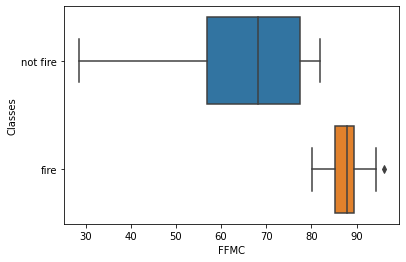

In [114]:
sns.boxplot(x='FFMC',y='Classes',data=df)

observation:
    1.we found some outlyers in ffmc and fire in above 90 ffmc
    2.not fire and ffmc no outlyers

# temperature and ws

<AxesSubplot:xlabel='Temperature', ylabel='Ws'>

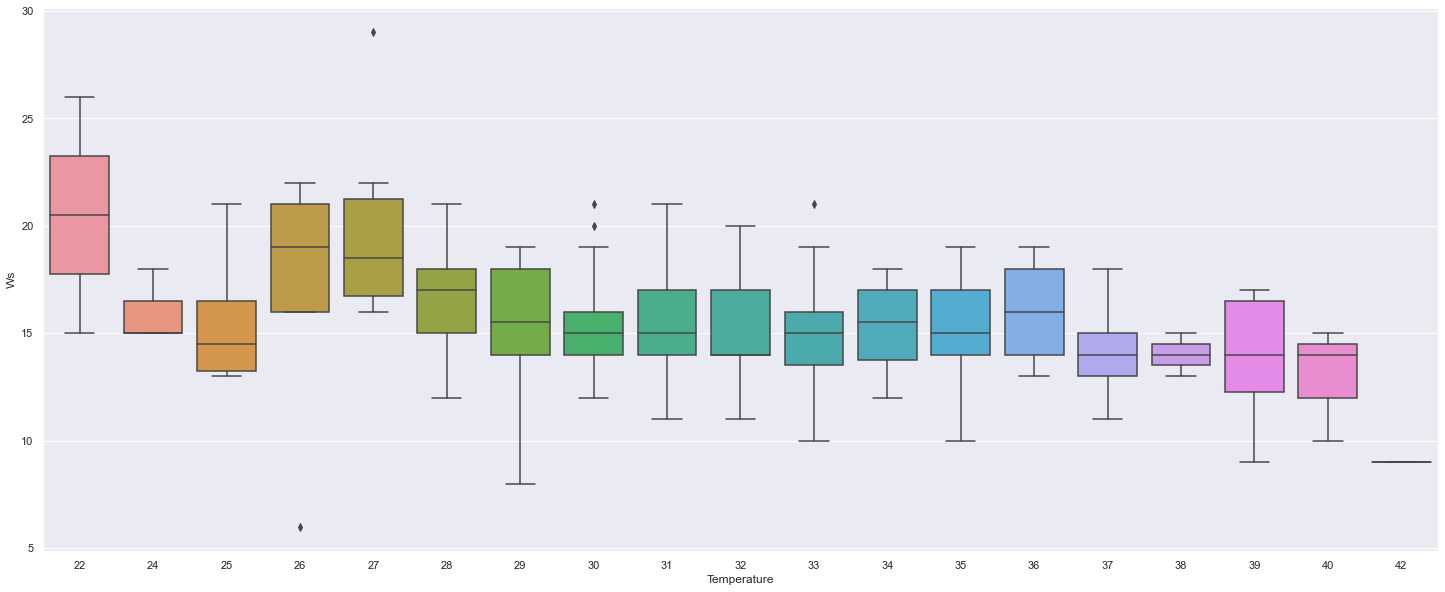

In [116]:
sns.set(rc={'figure.figsize':(25,10)})
sns.boxplot(x='Temperature',y='Ws',data=df)

observation:
    1.we found some outlyers in 27 ,30, 33 temperatures and ws

# Violinplot

he Violin plot is very much similar to a box plot, with the addition of a rotated kernel density plot on each side. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared.

# day and classes

<AxesSubplot:xlabel='day', ylabel='Classes'>

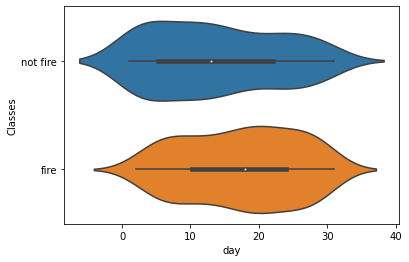

In [61]:
sns.violinplot(x='day',y='Classes',data=df)

observation:
    we see both are highly distributed in between 1 to 31

# FWI(fire weather index) vs Classes

<AxesSubplot:xlabel='FWI', ylabel='Classes'>

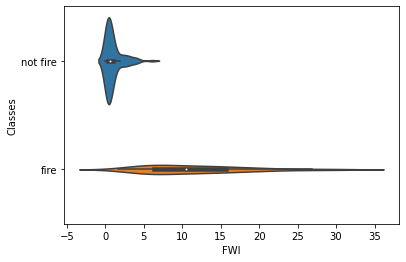

In [62]:
sns.violinplot(x='FWI',y='Classes',data=df)

observation:
    1.see plot when fwi is high then fire is spread is high
    2.when fwi is low then not fire is low

# Strip Plot

A strip plot is a graphical data anlysis technique for summarizing a data set. 

# month vs rain

<AxesSubplot:xlabel='month', ylabel='Rain'>

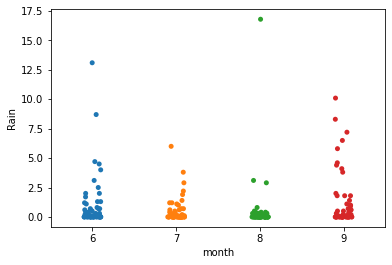

In [63]:
sns.stripplot(x='month',y='Rain',data=df)

observation:
    1.low rain in 8th and 7th month
    2.high rain in 9th and 6th month

# rain vs classes

<AxesSubplot:xlabel='Rain', ylabel='Classes'>

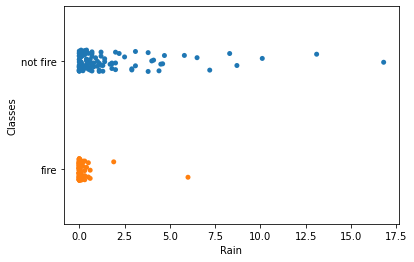

In [64]:
sns.stripplot(x='Rain',y='Classes',data=df)

observation:
    1.when high rain then not fire high
    2.rain is less then fire is high

# temperature vs classes

<AxesSubplot:xlabel='Temperature', ylabel='Classes'>

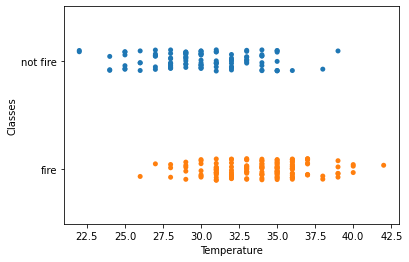

In [65]:
sns.stripplot(x='Temperature',y='Classes',data=df)

observation:
    1.temperature is high then fire is high
    2.when temperature is low then not fire is high

# classes vs region

<AxesSubplot:xlabel='Classes', ylabel='Region'>

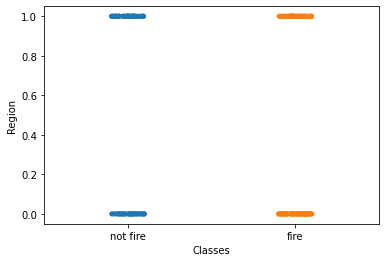

In [66]:
sns.stripplot(x='Classes',y='Region',data=df)

observation:
    1.when we see plot not fire in region 1 and 0 are similar
    2.see the fire in both region are similar

# Region vs Rain

<AxesSubplot:xlabel='Region', ylabel='Rain'>

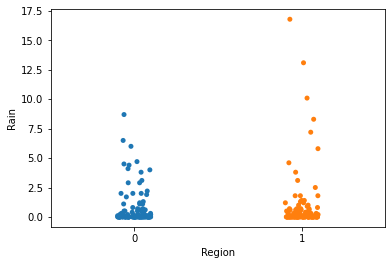

In [67]:
sns.stripplot(x='Region',y='Rain',data=df)

observation:
    1.rain in region 1 is high
    2.rain in region 0 is low

# Region vs Temperature

<AxesSubplot:xlabel='Region', ylabel='Temperature'>

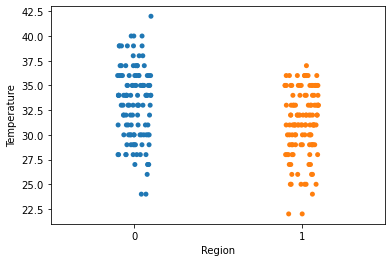

In [68]:
sns.stripplot(x='Region',y='Temperature',data=df)

observation:
    1.see plot in region 0 has high temperature
    2.in region 1 has low temperature

# region vs ffmc

<AxesSubplot:xlabel='Region', ylabel='FFMC'>

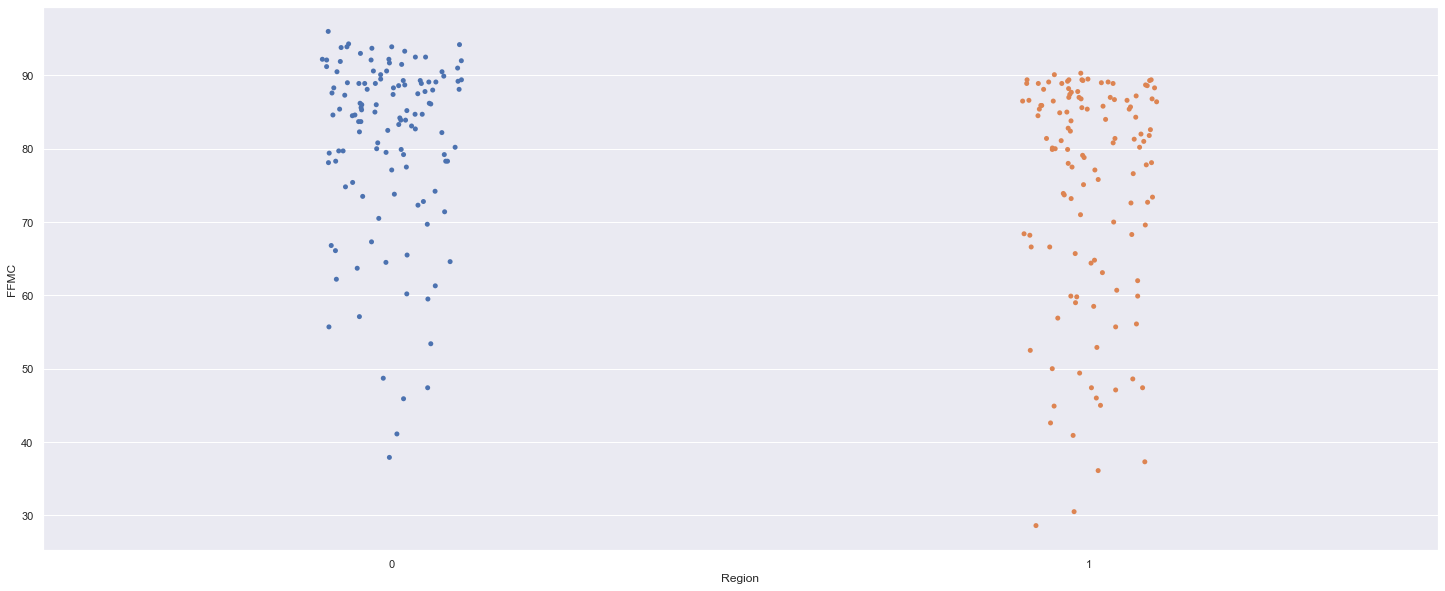

In [119]:
sns.stripplot(x='Region',y='FFMC',data=df)

observation:
    1.when region 0 has high ffmc
    2.region 1 has low ffmc as compared to region 0

# region vs dmc

<AxesSubplot:xlabel='Region', ylabel='DMC'>

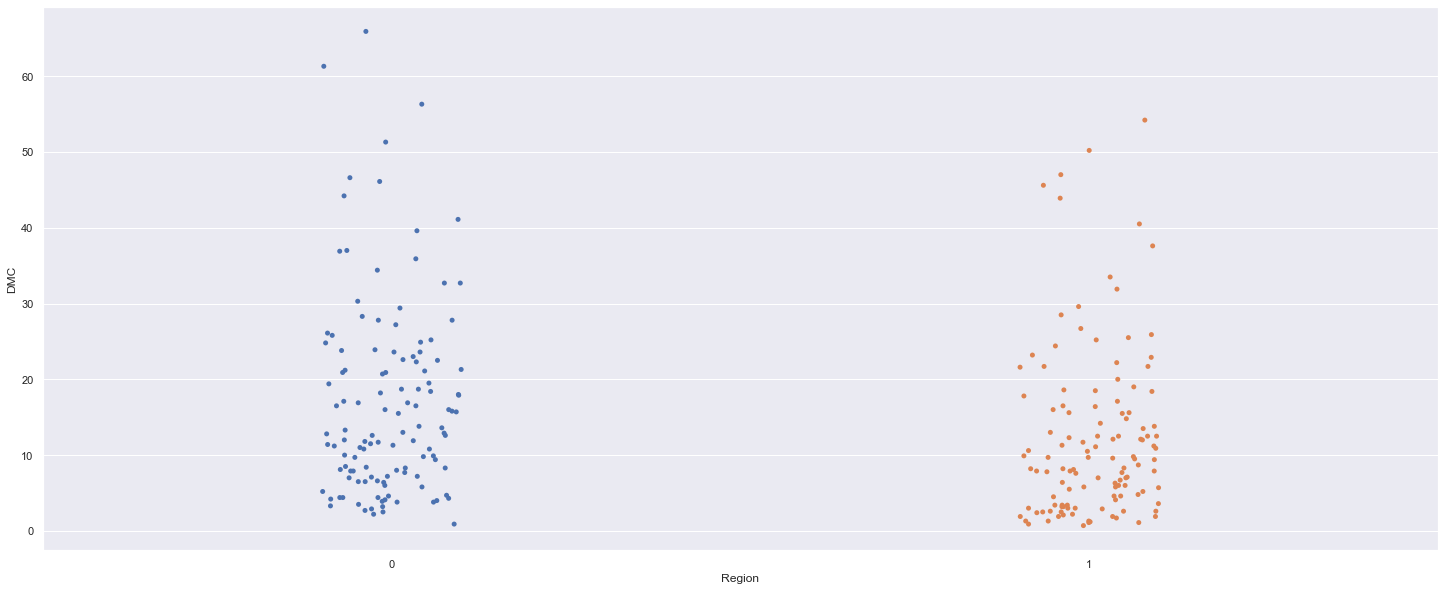

In [120]:
sns.stripplot(x='Region',y='DMC',data=df)

observation:
    1.see plot in region 0 high dmc 
    2.see plot in region 1 low dmc

# Line plot

A Line plot can be defined as a graph that displays data as points or check marks above a number line, showing the frequency of each value.

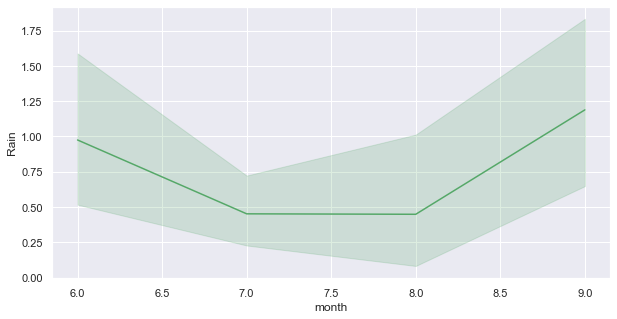

In [126]:
plt.subplots(figsize=(10,5))
sns.lineplot(x='month',y='Rain',data=df,color='g')
plt.show()

obsevation :-
    9th month is high rain and 8th month is low rains

# day vs rain

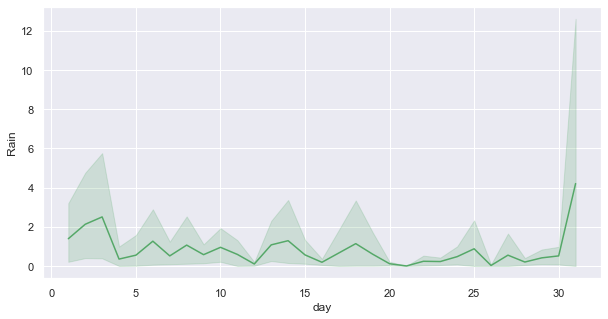

In [127]:
plt.subplots(figsize=(10,5))
sns.lineplot(x='day',y='Rain',data=df,color='g')
plt.show()

observation:-
    high rain 31 day
    low rain 12 th day

# rain vs region

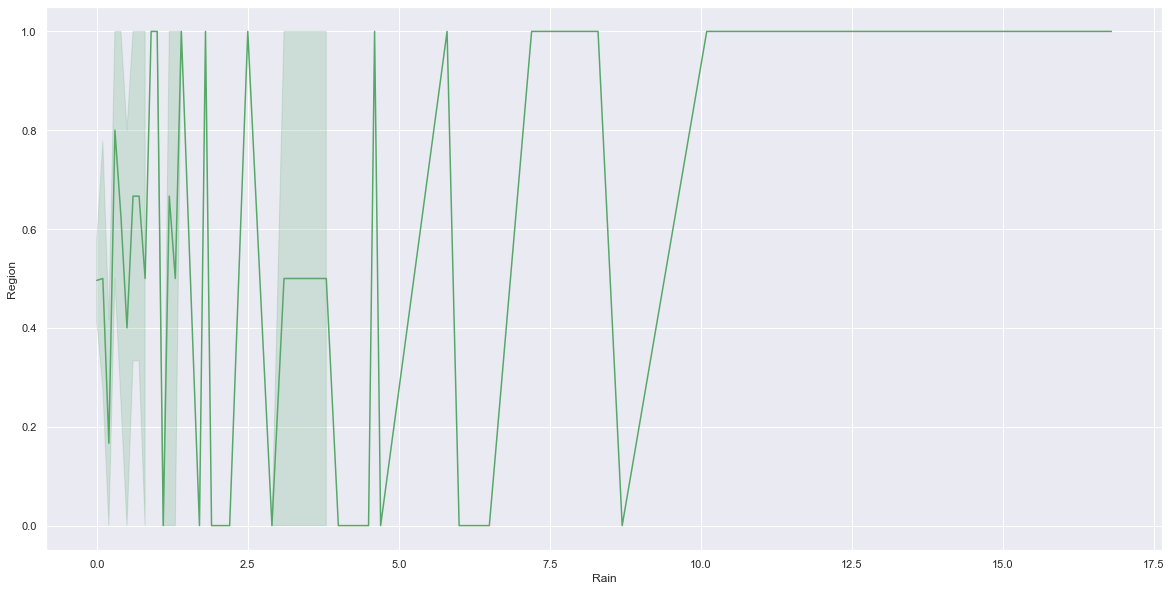

In [125]:
plt.subplots(figsize=(20,10))
sns.lineplot(x='Rain',y='Region',data=df,color='g')
plt.show()

observation:-
    rain is high not fire is high 
    rain is low fire is low
    

# wind speed vs temperature

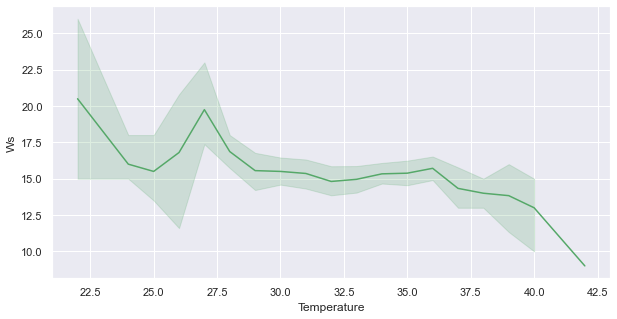

In [129]:
plt.subplots(figsize=(10,5))
sns.lineplot(x='Temperature',y='Ws',data=df,color='g')
plt.show()

observation:-
    temperature is low wind speed is high
    temperature is high wind speed is low

# Scatter Plot

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Classes', ylabel='Rain'>

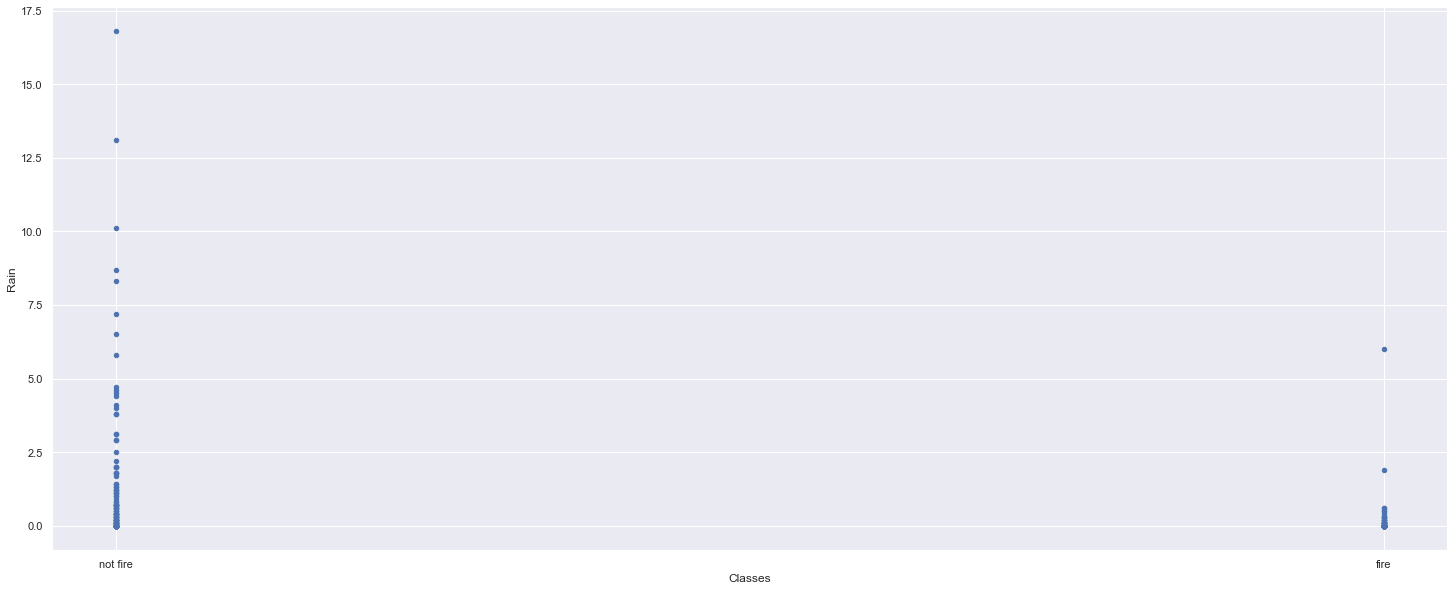

In [130]:
df.plot(x='Classes',y='Rain',kind='scatter')

obsevation :-
    see when rain is high so no fire is low
    when rain is low so fire is high

 # Rain vs Region

In [37]:
df.iplot(x='Region',y='Rain',kind='scatter',mode='markers')

# Barplot:-

In [38]:
df.iplot(x='Region',y='Rain',kind='bar',mode='markers')

obsevation:-
    see that 0 region is low rain
    see that 1 region is high rain
    

# temperature vs rain

In [39]:
df.iplot(x='Temperature',y='Rain',kind='bar',mode='markers')

# temperature vs region

In [40]:
df.iplot(x='Region',y='Temperature',kind='bar',mode='markers')

# classes vs temperature

In [41]:
df.iplot(x='Classes',y='Temperature',kind='bar',mode='markers')

# month vs temperature

In [42]:
df.iplot(x='month',y='Temperature',kind='bar',mode='markers')

observation:-
    see the graph 8 th month is the highest temperature
    lowest temperature is 9th month

In [43]:
df.iplot(x='day',y='Temperature',kind='bar',mode='markers')

observation :-
    see the graph 7 day is highest temperature as compared to others
    see the graph 31 day is lowest temperature

In [44]:
df.iplot(x='month',y='Classes',kind='bar',mode='markers')

# Relplot

# month vs rain

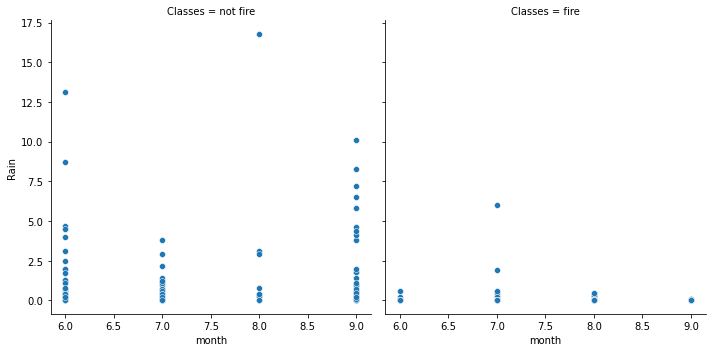

In [86]:
sns.relplot(x='month',y='Rain',data=df,col='Classes')

observation:
    rain high in not fire months 
    rain is low in fire month

# temperature vs rain

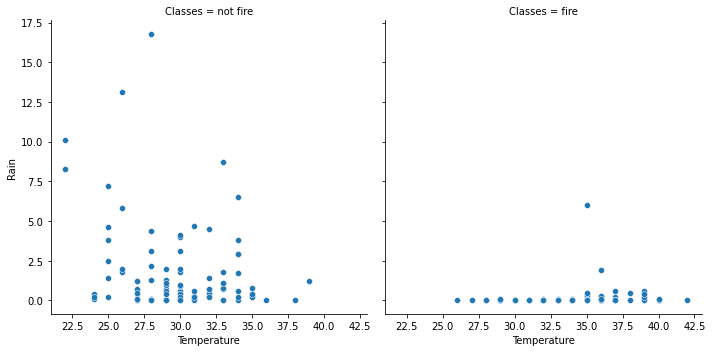

In [87]:
sns.relplot(x='Temperature',y='Rain',data=df,col='Classes')

observation:
    1.when temperature is low then rain is high in not fire
    2.when temperature is high the rain is low in fire

# region vs rain

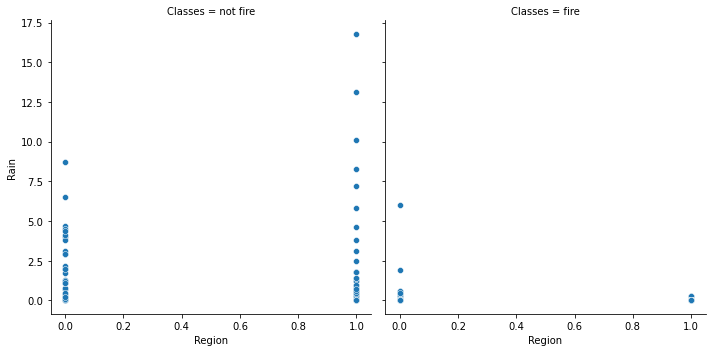

In [88]:
sns.relplot(x='Region',y='Rain',data=df,col='Classes')

# region vs temperature

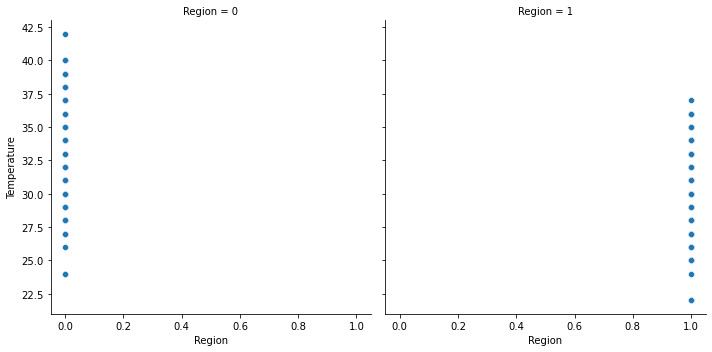

In [89]:
sns.relplot(x='Region',y='Temperature',data=df,col='Region')

# ffmc vs temperature

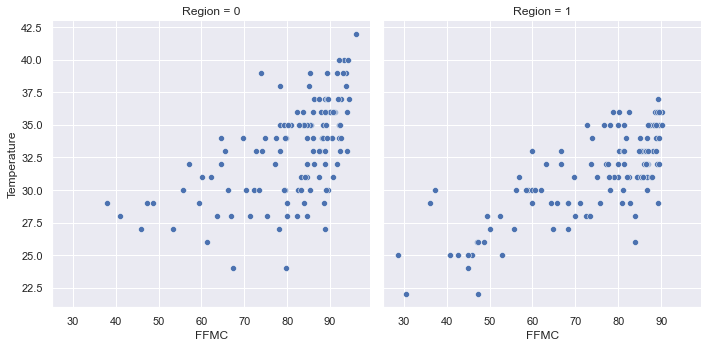

In [132]:
sns.relplot(x='FFMC',y='Temperature',data=df,col='Region')

observation:
    1.see plot the high spread in between 27 to 40 in region 0
    2.in region 1 see the high spread is in 25 to 37 most spread

# dmc vs temperature

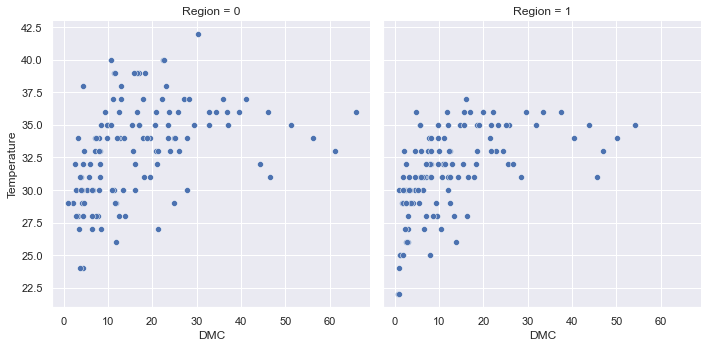

In [134]:
sns.relplot(x='DMC',y='Temperature',data=df,col='Region')

observation:
    1.see plot region 0 temperature and dmc are spredded in between 25 to 40 most spread
    2.in region 1 the dmc and temperature are highly spresd in 25 to 37 most

# dmc vs ffmc

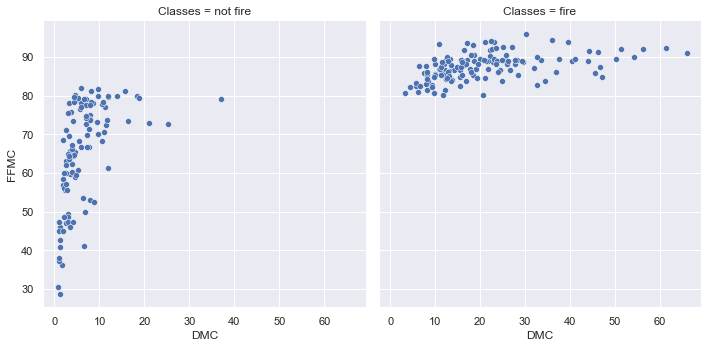

In [136]:
sns.relplot(x='DMC',y='FFMC',data=df,col='Classes')

observation:
    1.see plot when ffmc and dmc are highly spredded in 40 to 80  in not fire
    2.when we see the fire the dmc and ffmc are in highly spredded above

# Multivariate Analysis

# Pair plot

pair plot shows a clear and nice view of all variables and their relation ship with all other variables.

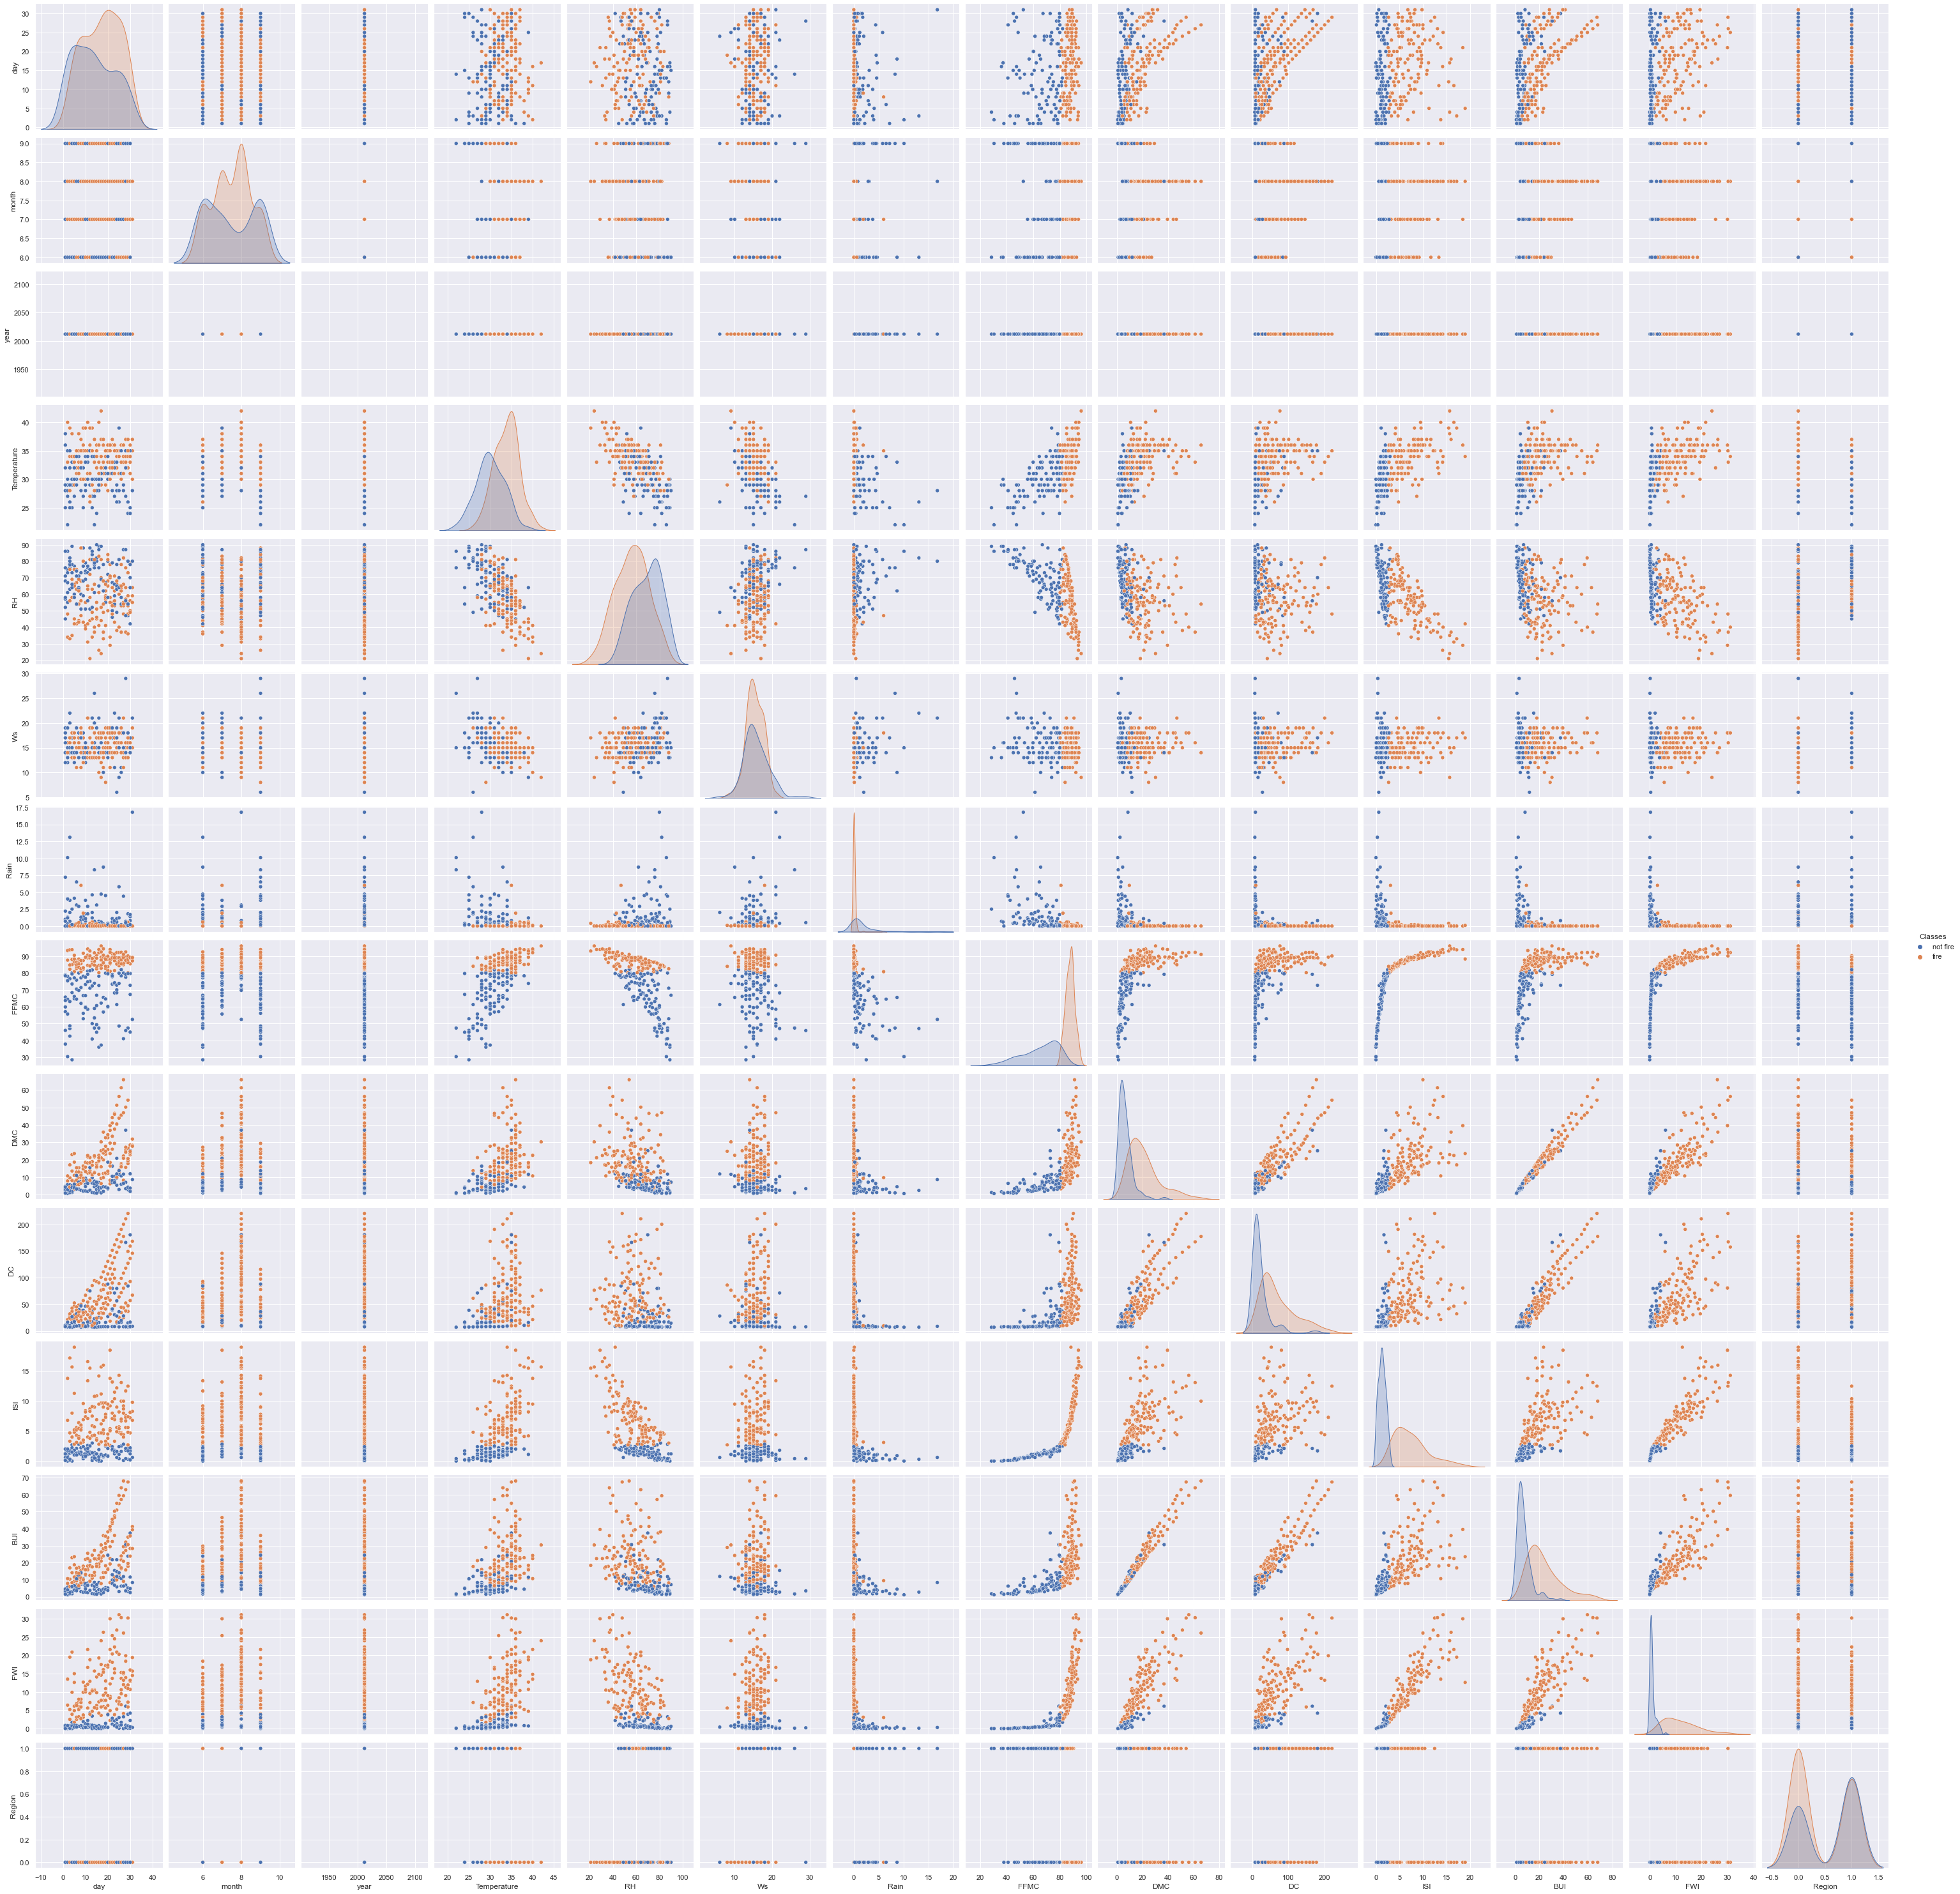

In [137]:
sns.pairplot(df,hue='Classes',size=3)

# Check Multicollinearity in Numerical features

In [139]:
df[num_col].corr()

day         month  year  Temperature        RH  \
day          1.000000e+00  2.232788e-17   NaN     0.095772 -0.074209   
month        2.232788e-17  1.000000e+00   NaN    -0.059017 -0.037884   
year                  NaN           NaN   NaN          NaN       NaN   
Temperature  9.577222e-02 -5.901677e-02   NaN     1.000000 -0.654443   
RH          -7.420934e-02 -3.788419e-02   NaN    -0.654443  1.000000   
Ws           4.700086e-02 -4.144673e-02   NaN    -0.278132  0.236084   
Rain        -1.122654e-01  3.532207e-02   NaN    -0.326786  0.222968   
FFMC         2.240321e-01  1.557668e-02   NaN     0.677491 -0.645658   
DMC          4.915710e-01  6.817778e-02   NaN     0.483105 -0.405133   
DC           5.279285e-01  1.276719e-01   NaN     0.370498 -0.220330   
ISI          1.793008e-01  6.354476e-02   NaN     0.605971 -0.688268   
BUI          5.172239e-01  8.556743e-02   NaN     0.456415 -0.349685   
FWI          3.502343e-01  8.173226e-02   NaN     0.566839 -0.580457   
Region      -4.662229e-16  6.718556e-17   NaN    -0.273496  0.406424   

                   Ws      Rain      FFMC       DMC        DC       ISI  \
day          0.047001 -0.112265  0.224032  0.491571  0.527929  0.179301   
month       -0.041447  0.035322  0.015577  0.068178  0.127672  0.063545   
year              NaN       NaN       NaN       NaN       NaN       NaN   
Temperature -0.278132 -0.326786  0.677491  0.483105  0.370498  0.605971   
RH           0.236084  0.222968 -0.645658 -0.405133 -0.220330 -0.688268   
Ws           1.000000  0.170169 -0.163255 -0.001246  0.076245  0.012245   
Rain         0.170169  1.000000 -0.544045 -0.288548 -0.296804 -0.347862   
FFMC        -0.163255 -0.544045  1.000000  0.602391  0.503910  0.740751   
DMC         -0.001246 -0.288548  0.602391  1.000000  0.875358  0.678355   
DC           0.076245 -0.296804  0.503910  0.875358  1.000000  0.503919   
ISI          0.012245 -0.347862  0.740751  0.678355  0.503919  1.000000   
BUI          0.030303 -0.299409  0.590251  0.982206  0.941672  0.641351   
FWI          0.033957 -0.324755  0.691430  0.875191  0.737041  0.922422   
Region       0.176829  0.041080 -0.224680 -0.191094  0.081489 -0.266298   

                  BUI       FWI        Region  
day          0.517224  0.350234 -4.662229e-16  
month        0.085567  0.081732  6.718556e-17  
year              NaN       NaN           NaN  
Temperature  0.456415  0.566839 -2.734961e-01  
RH          -0.349685 -0.580457  4.064239e-01  
Ws           0.030303  0.033957  1.768290e-01  
Rain        -0.299409 -0.324755  4.108006e-02  
FFMC         0.590251  0.691430 -2.246798e-01  
DMC          0.982206  0.875191 -1.910937e-01  
DC           0.941672  0.737041  8.148947e-02  
ISI          0.641351  0.922422 -2.662977e-01  
BUI          1.000000  0.856912 -8.799645e-02  
FWI          0.856912  1.000000 -1.984738e-01  
Region      -0.087996 -0.198474  1.000000e+00

# Check Multicollinearity in Numerical features

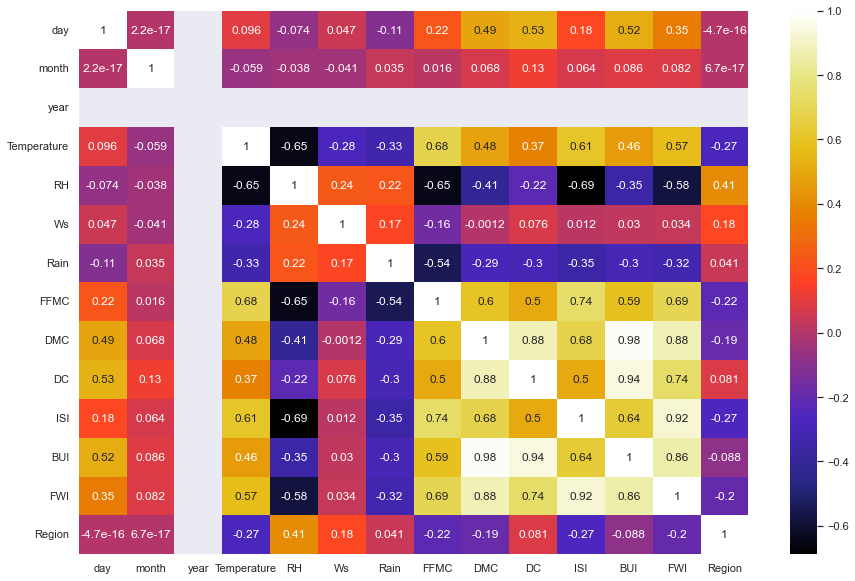

In [140]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='CMRmap',annot=True)
plt.show()

Author: Ramdas Dharavath
    
GitHub link: https://github.com/dharavathramdas101/EDA

linkedin link : https://www.linkedin.com/in/dharavath-ramdas-a283aa213/